<a href="https://colab.research.google.com/github/tabilaocov/ady_cov.github.io/blob/master/scr/tabilao/Tabilao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [232]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas.testing as tm


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoafaritra.csv")

tilyvoaky = pd.read_csv("/content/drive/My Drive/data/dataky.csv")

tilyvoasaf = pd.read_csv("/content/drive/My Drive/data/datasaf.csv")

tilyvoafar = tilyvoa.groupby('Faritra')

tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)
tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)


tilyvoaanala = tilyvoafar.get_group('Analamanga')
tilyvoaanala.set_index('Daty', inplace=True)
tilyvoaanala.index = pd.to_datetime(tilyvoaanala.index)

tilyvoaatsi = tilyvoafar.get_group('Atsinanana')
tilyvoaatsi.set_index('Daty', inplace=True)
tilyvoaatsi.index = pd.to_datetime(tilyvoaatsi.index)

tilyvoaalao = tilyvoafar.get_group('Alaotra')
tilyvoaalao.set_index('Daty', inplace=True)
tilyvoaalao.index = pd.to_datetime(tilyvoaalao.index)

tilyvoamania = tilyvoafar.get_group('Mania')
tilyvoamania.set_index('Daty', inplace=True)
tilyvoamania.index = pd.to_datetime(tilyvoamania.index)

tilyvoajiro = tilyvoafar.get_group('Analanjirofo')
tilyvoajiro.set_index('Daty', inplace=True)
tilyvoajiro.index = pd.to_datetime(tilyvoajiro.index)

tilyvoanosy = tilyvoafar.get_group('Anosy')
tilyvoanosy.set_index('Daty', inplace=True)
tilyvoanosy.index = pd.to_datetime(tilyvoanosy.index)

tilyvoaandro = tilyvoafar.get_group('Androy')
tilyvoaandro.set_index('Daty', inplace=True)
tilyvoaandro.index = pd.to_datetime(tilyvoaandro.index)

tilyvoaatsim = tilyvoafar.get_group('Atsimoandrefana')
tilyvoaatsim.set_index('Daty', inplace=True)
tilyvoaatsim.index = pd.to_datetime(tilyvoaatsim.index)

tilyvoaatsitsi = tilyvoafar.get_group('AtsimoAtsinanana')
tilyvoaatsitsi.set_index('Daty', inplace=True)
tilyvoaatsitsi.index = pd.to_datetime(tilyvoaatsitsi.index)

tilyvoabe = tilyvoafar.get_group('Betsiboka')
tilyvoabe.set_index('Daty', inplace=True)
tilyvoabe.index = pd.to_datetime(tilyvoabe.index)

tilyvoaboe = tilyvoafar.get_group('Boeny')
tilyvoaboe.set_index('Daty', inplace=True)
tilyvoaboe.index = pd.to_datetime(tilyvoaboe.index)

tilyvoabon = tilyvoafar.get_group('Bongolava')
tilyvoabon.set_index('Daty', inplace=True)
tilyvoabon.index = pd.to_datetime(tilyvoabon.index)

tilyvoadia = tilyvoafar.get_group('Diana')
tilyvoadia.set_index('Daty', inplace=True)
tilyvoadia.index = pd.to_datetime(tilyvoadia.index)

tilyvoatsiatr = tilyvoafar.get_group('Matsiatra')
tilyvoatsiatr.set_index('Daty', inplace=True)
tilyvoatsiatr.index = pd.to_datetime(tilyvoatsiatr.index)

tilyvoahoro = tilyvoafar.get_group('Ihorombe')
tilyvoahoro.set_index('Daty', inplace=True)
tilyvoahoro.index = pd.to_datetime(tilyvoahoro.index)

tilyvoatasy = tilyvoafar.get_group('Itasy')
tilyvoatasy.set_index('Daty', inplace=True)
tilyvoatasy.index = pd.to_datetime(tilyvoatasy.index)

tilyvoamel = tilyvoafar.get_group('Melaky')
tilyvoamel.set_index('Daty', inplace=True)
tilyvoamel.index = pd.to_datetime(tilyvoamel.index)

tilyvoamena = tilyvoafar.get_group('Menabe')
tilyvoamena.set_index('Daty', inplace=True)
tilyvoamena.index = pd.to_datetime(tilyvoamena.index)

tilyvoasava = tilyvoafar.get_group('Sava')
tilyvoasava.set_index('Daty', inplace=True)
tilyvoasava.index = pd.to_datetime(tilyvoasava.index)

tilyvoasofi = tilyvoafar.get_group('Sofia')
tilyvoasofi.set_index('Daty', inplace=True)
tilyvoasofi.index = pd.to_datetime(tilyvoasofi.index)

tilyvoakara = tilyvoafar.get_group('Vakinakaratra')
tilyvoakara.set_index('Daty', inplace=True)
tilyvoakara.index = pd.to_datetime(tilyvoakara.index)

tilyvoavavy = tilyvoafar.get_group('Vatovavy')
tilyvoavavy.set_index('Daty', inplace=True)
tilyvoavavy.index = pd.to_datetime(tilyvoavavy.index)

tilyvoakyfar = tilyvoaky.groupby('Faritra')

tilyvoaken = tilyvoakyfar.get_group('Kenya')
tilyvoaken.set_index('Daty', inplace=True)
tilyvoaken.index = pd.to_datetime(tilyvoaken.index)

tilyvoanbo = tilyvoakyfar.get_group('Nairobi')
tilyvoanbo.set_index('Daty', inplace=True)
tilyvoanbo.index = pd.to_datetime(tilyvoanbo.index)

tilyvoasaf.set_index('Daty', inplace=True)
tilyvoasaf.index = pd.to_datetime(tilyvoasaf.index)

path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

In [234]:
daty_data_manom = datetime.date(2021,4,28)
daty_data_mifar = datetime.date(2021,7,3)

format_date = lambda date_py: '{}-{}-{}'.format(date_py.year, date_py.month, date_py.day)

In [235]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  sitr = 0
  for j in range(7):
    sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(sitr/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


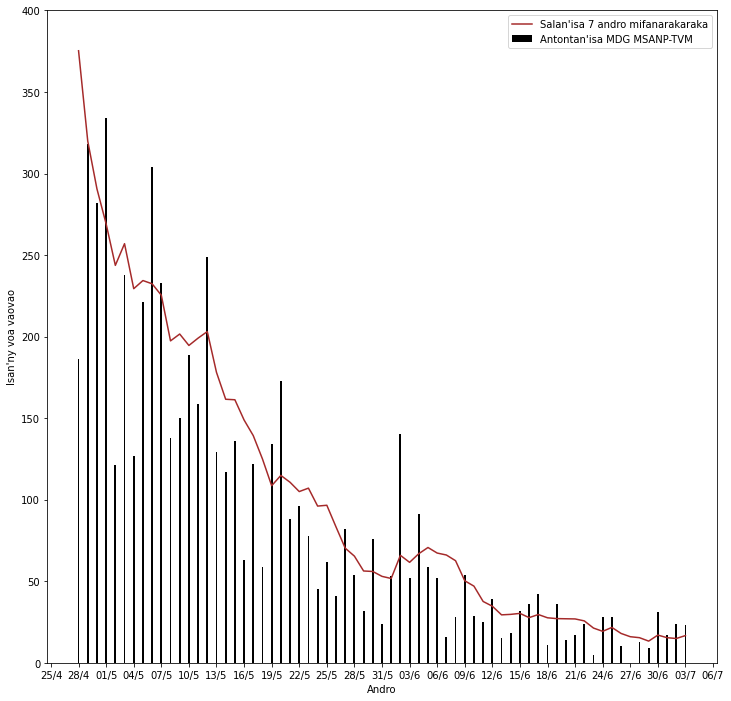

In [236]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,400)
plt.savefig(path_to_save+'voavaozao.eps')
plt.savefig(path_to_save+'voavaozao.png')

plt.show()

In [237]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_7'] = voat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


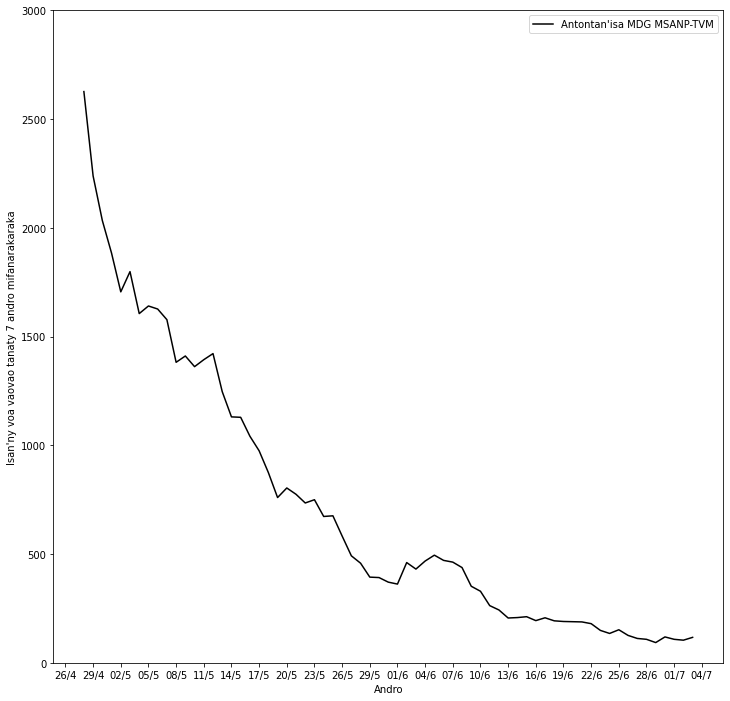

In [238]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatan_7'], color='black',label="Antontan'isa MDG MSANP-TVM")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao tanaty 7 andro mifanarakaraka")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,3000)
#plt.savefig(path_to_save+'voavao7zao.eps')
#plt.savefig(path_to_save+'voavao7zao.png')

plt.show()

### Kenya

In [239]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


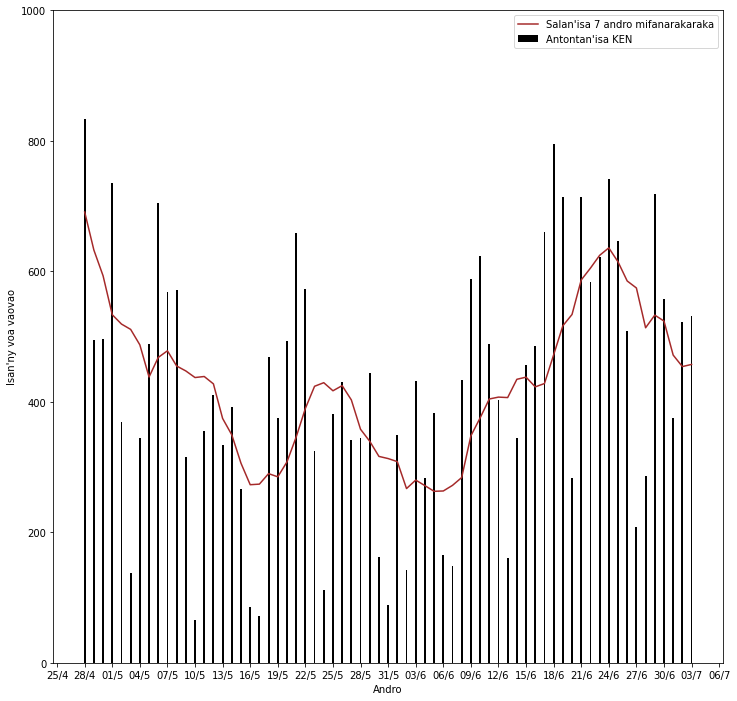

In [240]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa KEN")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1000)
#plt.savefig(path_to_save+'voavaozaoken.eps')
#plt.savefig(path_to_save+'voavaozaoken.png')

plt.show()

In [241]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_7'] = voat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Fampitahana

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


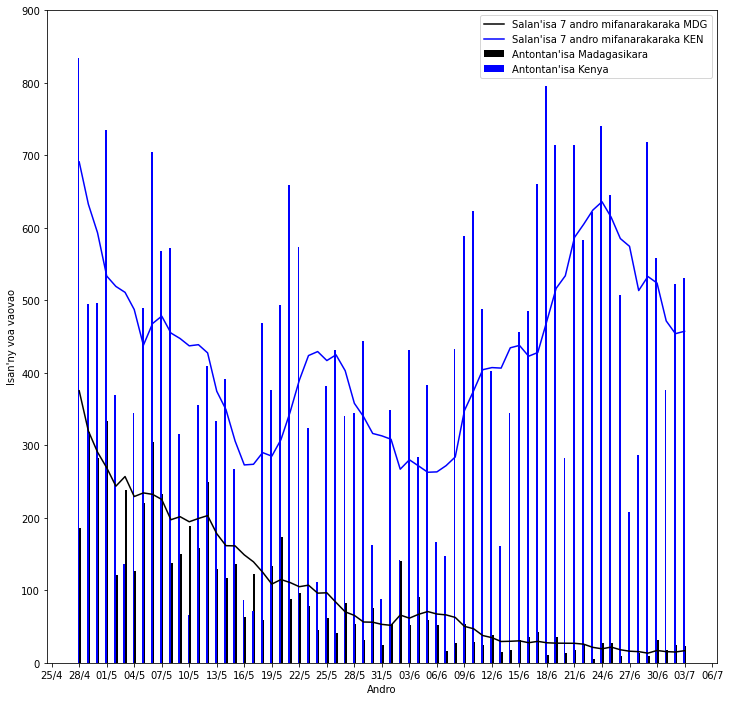

In [242]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index + frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa Madagasikara")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='black',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='blue',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='blue',label="Salan'isa 7 andro mifanarakaraka KEN")
ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,900)
plt.savefig(path_to_save+'voavaozaomdgken.eps')
plt.savefig(path_to_save+'voavaozaomdgken.png')

plt.show()

### Afrika Atsimo

In [243]:
for i in range((daty_data_mifar - daty_data_manom).days +1+7):
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Voatomb'] = tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Voareh'] - tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1-7)),'Voareh']  

In [244]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

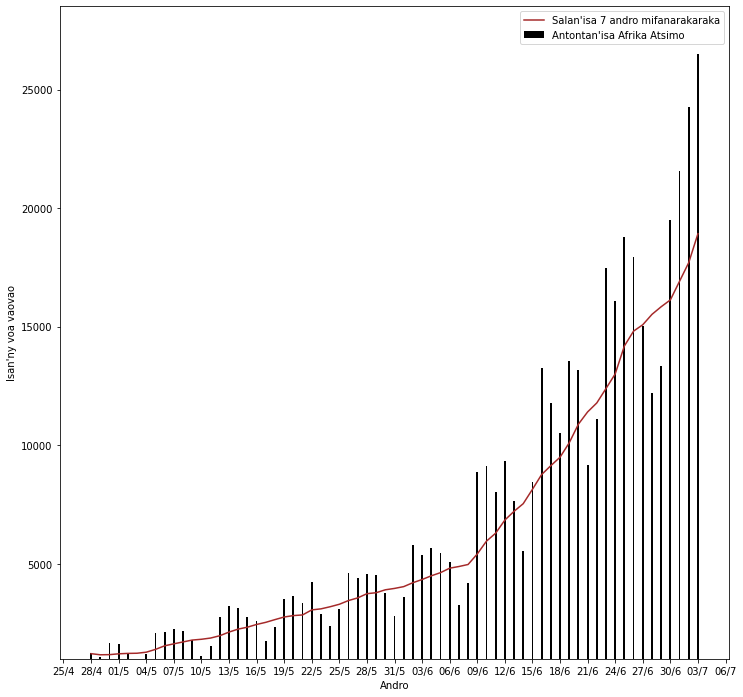

In [245]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(1000,28500)
#plt.savefig(path_to_save+'voavaozaosaf.eps')
#plt.savefig(path_to_save+'voavaozaosaf.png')

plt.show()

### Fampitahana

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


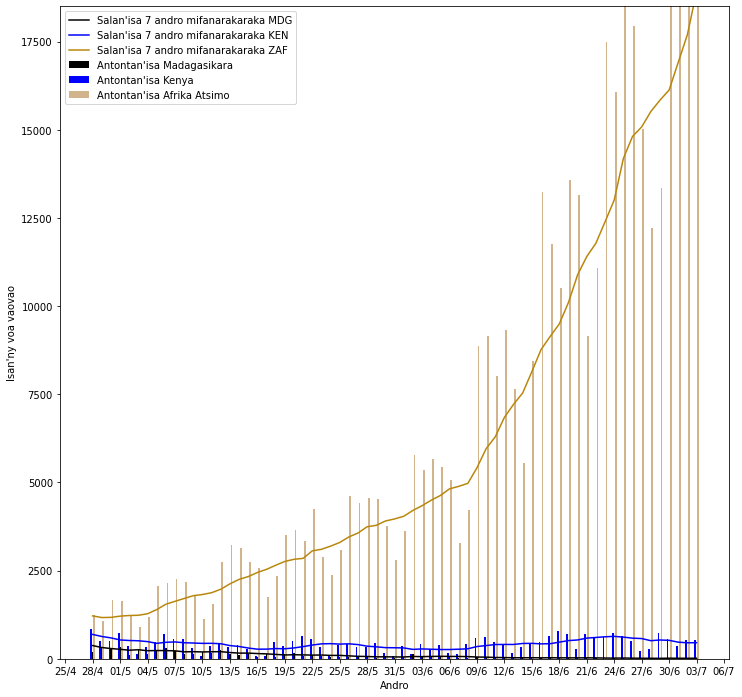

In [246]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa Madagasikara")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='black',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='blue',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='blue',label="Salan'isa 7 andro mifanarakaraka KEN")

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='tan',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='darkgoldenrod',label="Salan'isa 7 andro mifanarakaraka ZAF")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,18500)
plt.savefig(path_to_save+'voavaozaomdgkensaf.eps')
plt.savefig(path_to_save+'voavaozaomdgkensaf.png')

plt.show()

In [247]:
# Isan'ny mponina
nmdg = 27691018
nken = 53771296
nnbo = 4735000
ntnr = 3369000
nanala = 4000000

In [248]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoamdg.loc[format_date(daty_data_manom),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 1)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 2)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 3)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 4)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 5)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 6)),'Voatomb'])/nmdg
  else:
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i-2)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 3)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 4)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 5)),'Voatomb'] + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 6)),'Voatomb'])/nmdg

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoaken.loc[format_date(daty_data_manom),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 1)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 2)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 3)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 4)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 5)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 6)),'Voatomb'])/nken
  else:
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i-2)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 3)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 4)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 5)),'Voatomb'] + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 6)),'Voatomb'])/nken

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


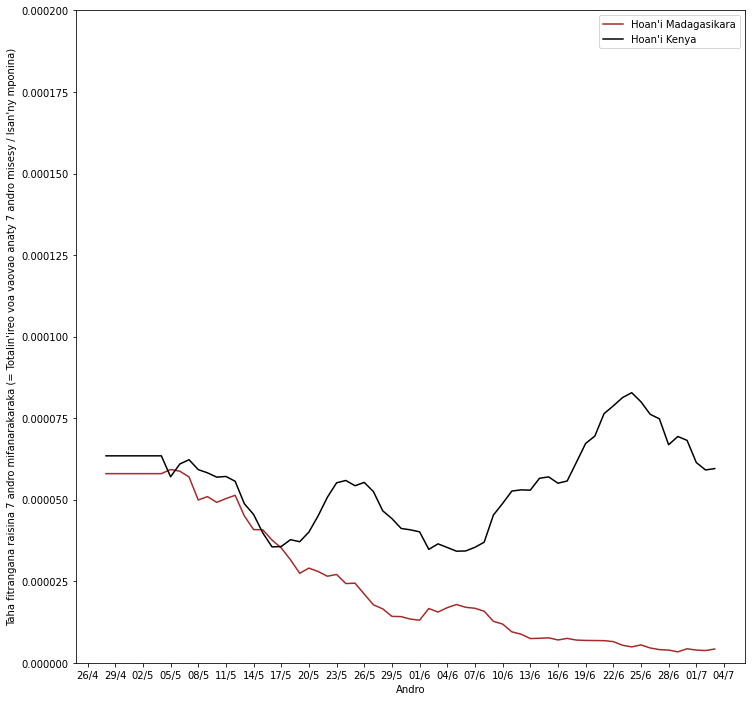

In [249]:
fig, ax = plt.subplots(figsize=(12, 12))


ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'thvoatomb_7'], color='brown',label="Hoan'i Madagasikara")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'thvoatomb_7'], color='black',label="Hoan'i Kenya")

ax.set(xlabel ='Andro', ylabel = "Taha fitrangana raisina 7 andro mifanarakaraka (= Totalin'ireo voa vaovao anaty 7 andro misesy / Isan'ny mponina)")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.0002)
plt.savefig(path_to_save+'thvoa7mdgken.eps')
plt.savefig(path_to_save+'thvoa7mdgken.png')

plt.show()

In [250]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


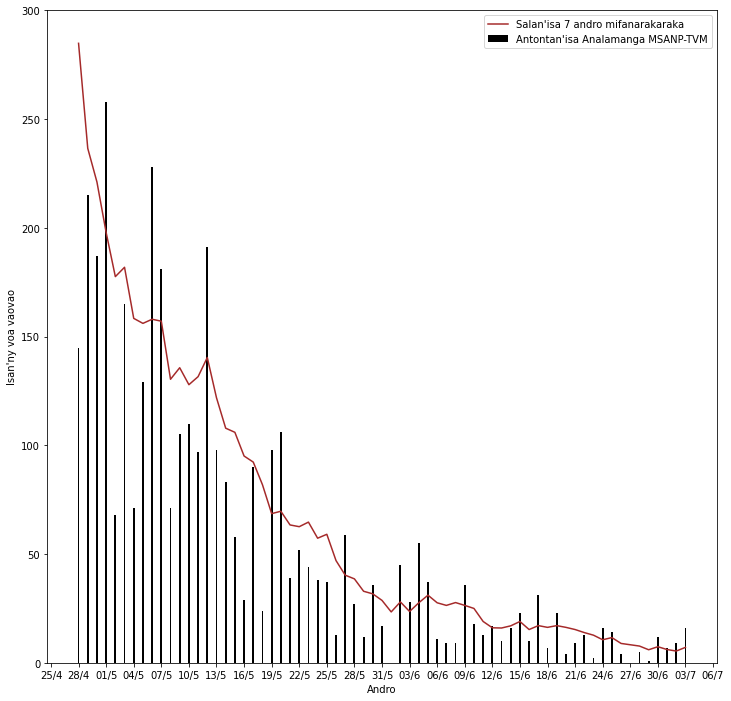

In [251]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaanala.loc[daty_data_manom:daty_data_mifar].index, tilyvoaanala.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Analamanga MSANP-TVM")
ax.plot(tilyvoaanala.loc[daty_data_manom:daty_data_mifar].index, tilyvoaanala.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,300)
plt.savefig(path_to_save+'voavaoanalazao.eps')
plt.savefig(path_to_save+'voavaoanalazao.png')

plt.show()

In [252]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoaanala.loc[format_date(daty_data_manom),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 1)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 2)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 3)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 4)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 5)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = 6)),'Voatomb'])/nanala
  else:
    tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i-2)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 3)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 4)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 5)),'Voatomb'] + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 6)),'Voatomb'])/nanala
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoanbo.loc[format_date(daty_data_manom),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 1)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 2)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 3)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 4)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 5)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = 6)),'Voatomb'])/nnbo
  else:
    tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'thvoatomb_7'] = (tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i-2)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 3)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 4)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 5)),'Voatomb'] + tilyvoanbo.loc[format_date(daty_data_manom + datetime.timedelta(days = i - 6)),'Voatomb'])/nnbo


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


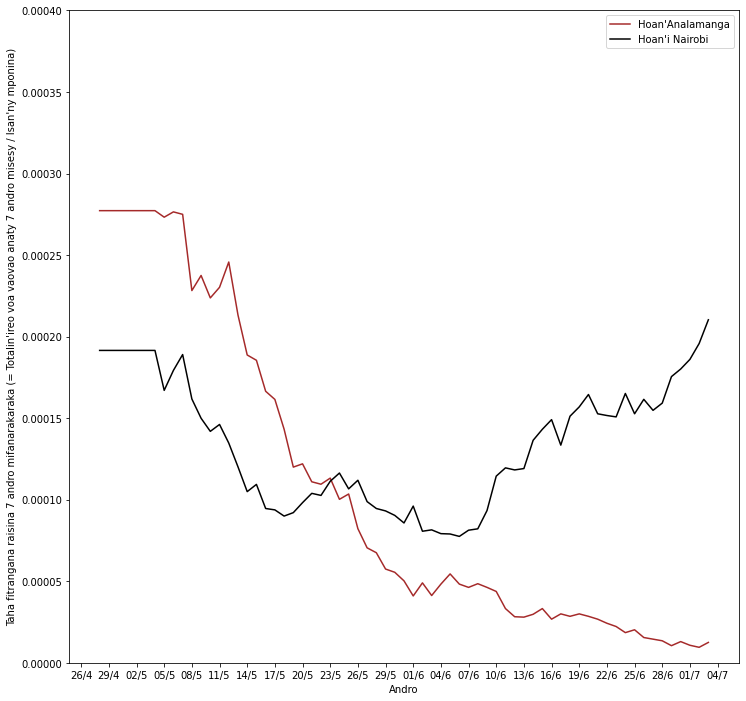

In [253]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoaanala.loc[daty_data_manom:daty_data_mifar].index, tilyvoaanala.loc[daty_data_manom:daty_data_mifar,'thvoatomb_7'], color='brown',label="Hoan'Analamanga")
ax.plot(tilyvoanbo.loc[daty_data_manom:daty_data_mifar].index, tilyvoanbo.loc[daty_data_manom:daty_data_mifar,'thvoatomb_7'], color='black',label="Hoan'i Nairobi")

ax.set(xlabel ='Andro', ylabel = "Taha fitrangana raisina 7 andro mifanarakaraka (= Totalin'ireo voa vaovao anaty 7 andro misesy / Isan'ny mponina)")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.0004)
#plt.savefig(path_to_save+'thvoa7analanbo.eps')
#plt.savefig(path_to_save+'thvoa7analanbo.png')

plt.show()

#### MDG sy Analamanga 

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


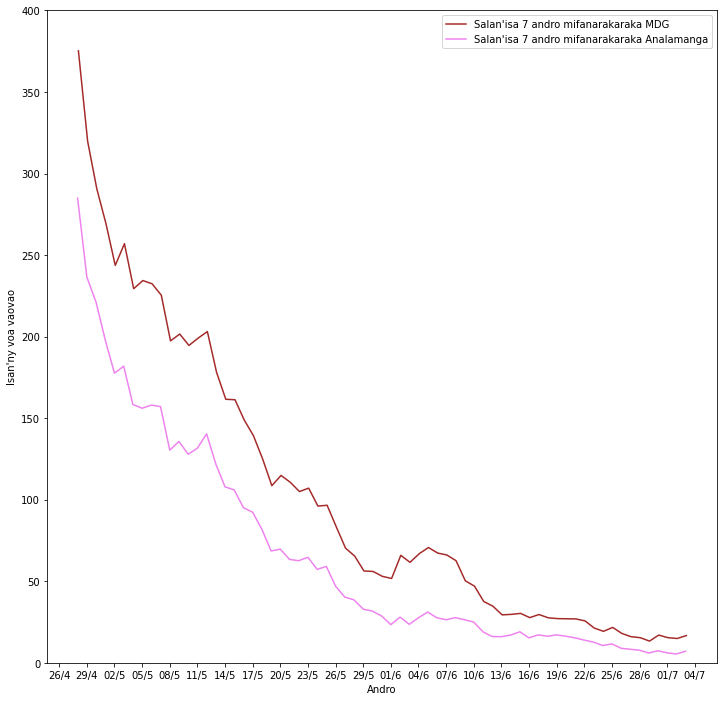

In [254]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index  + frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka MDG")
ax.plot(tilyvoaanala.loc[daty_data_manom:daty_data_mifar].index, tilyvoaanala.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='violet',label="Salan'isa 7 andro mifanarakaraka Analamanga")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,400)
plt.savefig(path_to_save+'voavaozaomdganala.eps')
plt.savefig(path_to_save+'voavaozaomdganala.png')

plt.show()

### Atsinanana

In [255]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaatsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaatsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


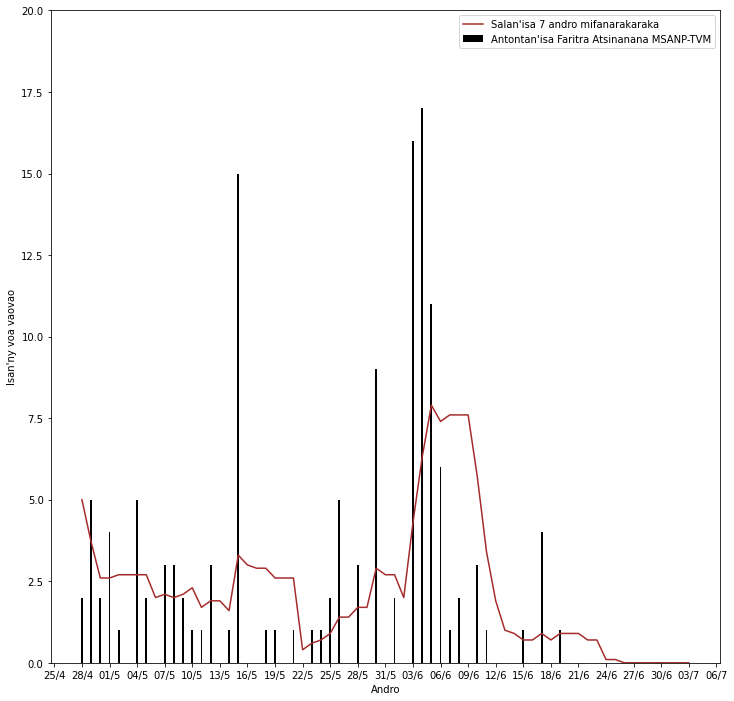

In [256]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaatsi.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsi.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Faritra Atsinanana MSANP-TVM")
ax.plot(tilyvoaatsi.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsi.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
plt.savefig(path_to_save+'voavaoatsizao.eps')
plt.savefig(path_to_save+'voavaoatsizao.png')

plt.show()

### Alaotra Mangoro

In [257]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaalao.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaalao.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


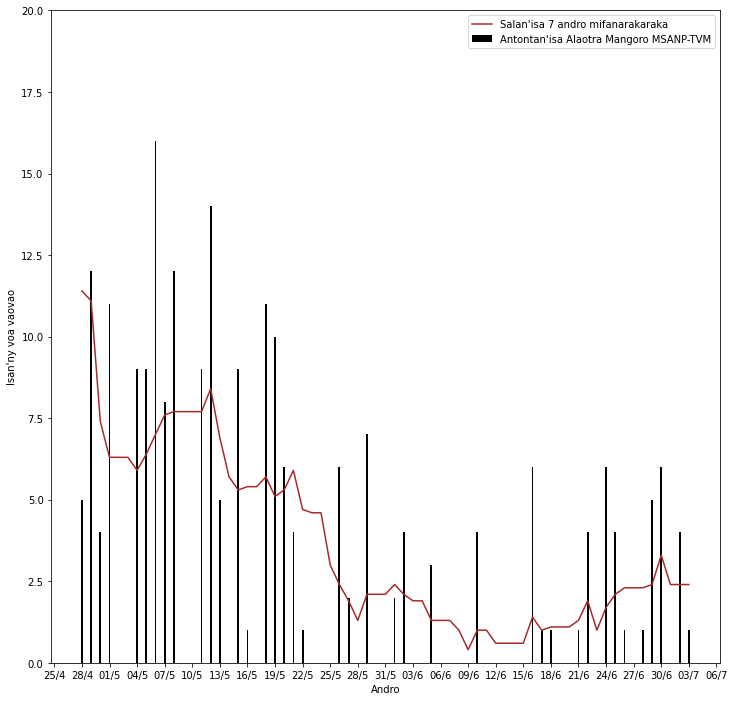

In [258]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaalao.loc[daty_data_manom:daty_data_mifar].index, tilyvoaalao.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Alaotra Mangoro MSANP-TVM")
ax.plot(tilyvoaalao.loc[daty_data_manom:daty_data_mifar].index, tilyvoaalao.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
plt.savefig(path_to_save+'voavaoalaozao.eps')
plt.savefig(path_to_save+'voavaoalaozao.png')

plt.show()

### Amoron'i Mania

In [259]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamania.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoamania.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


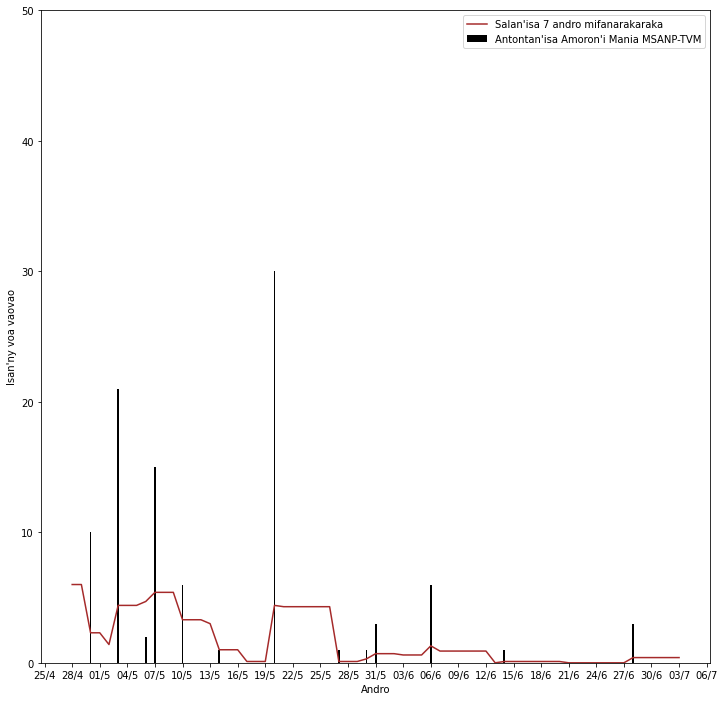

In [260]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamania.loc[daty_data_manom:daty_data_mifar].index, tilyvoamania.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Amoron'i Mania MSANP-TVM")
ax.plot(tilyvoamania.loc[daty_data_manom:daty_data_mifar].index, tilyvoamania.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaomaniazao.eps')
plt.savefig(path_to_save+'voavaomaniazao.png')

plt.show()

### Analanjirofo

In [261]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoajiro.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoajiro.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


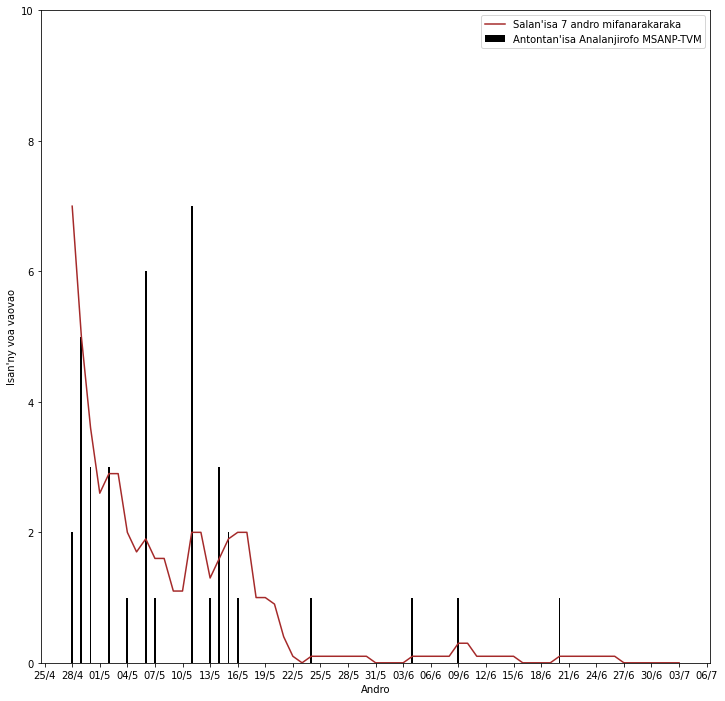

In [262]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoajiro.loc[daty_data_manom:daty_data_mifar].index, tilyvoajiro.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Analanjirofo MSANP-TVM")
ax.plot(tilyvoajiro.loc[daty_data_manom:daty_data_mifar].index, tilyvoajiro.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaojirozao.eps')
plt.savefig(path_to_save+'voavaojirozao.png')

plt.show()

### Anosy

In [263]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoanosy.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoanosy.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


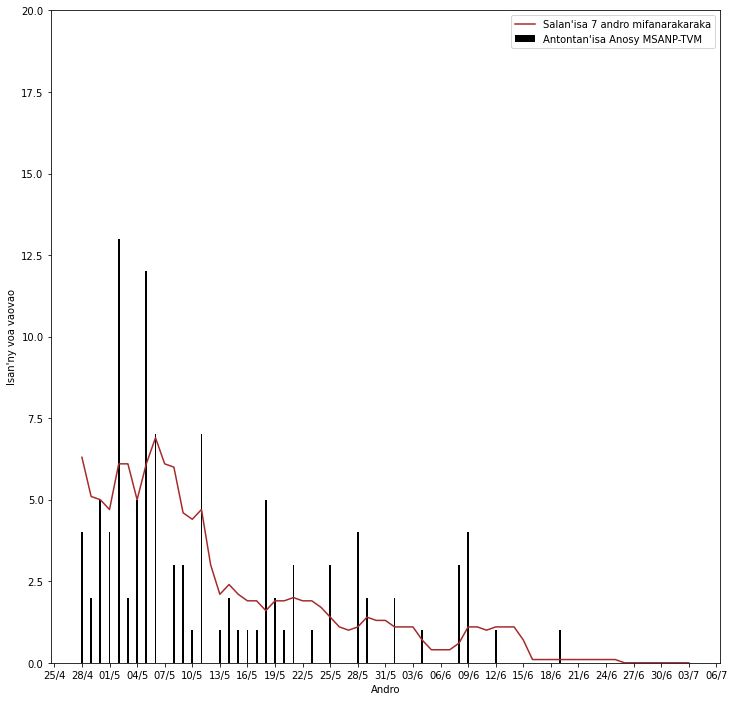

In [264]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoanosy.loc[daty_data_manom:daty_data_mifar].index, tilyvoanosy.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Anosy MSANP-TVM")
ax.plot(tilyvoanosy.loc[daty_data_manom:daty_data_mifar].index, tilyvoanosy.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
plt.savefig(path_to_save+'voavaonosyzao.eps')
plt.savefig(path_to_save+'voavaonosyzao.png')

plt.show()

### Androy

In [265]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaandro.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaandro.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


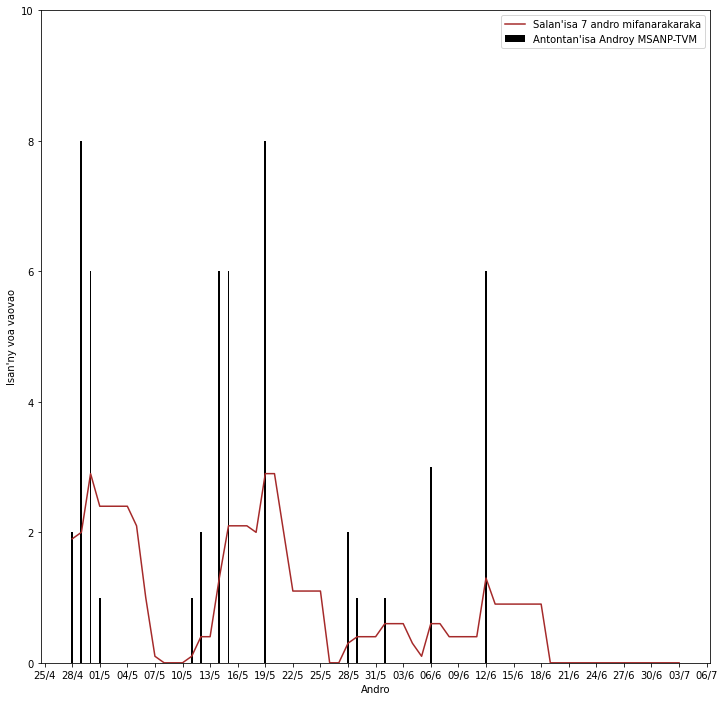

In [266]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaandro.loc[daty_data_manom:daty_data_mifar].index, tilyvoaandro.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Androy MSANP-TVM")
ax.plot(tilyvoaandro.loc[daty_data_manom:daty_data_mifar].index, tilyvoaandro.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaoandrozao.eps')
plt.savefig(path_to_save+'voavaoandrozao.png')

plt.show()

### Atsimo Andrefana

In [267]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaatsim.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaatsim.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


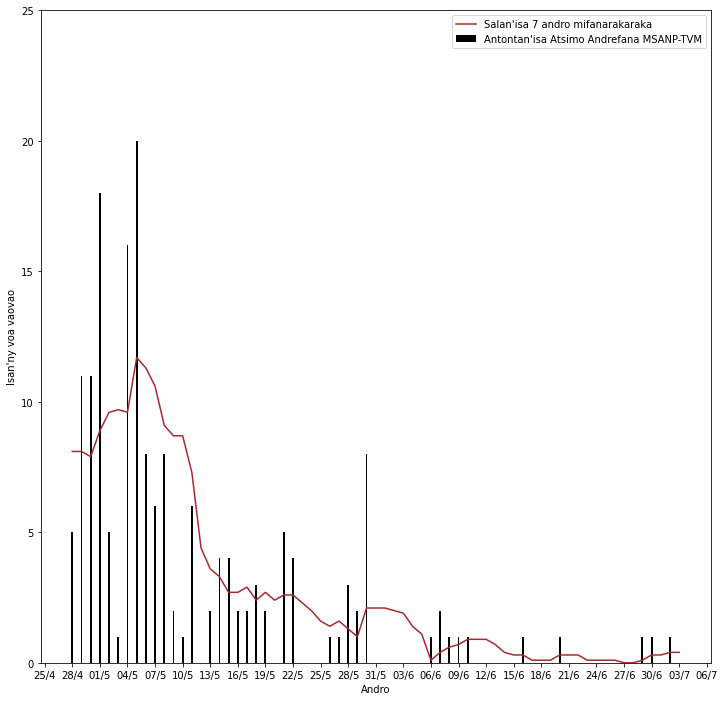

In [268]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaatsim.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsim.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Atsimo Andrefana MSANP-TVM")
ax.plot(tilyvoaatsim.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsim.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,25)
plt.savefig(path_to_save+'voavaoatsimzao.eps')
plt.savefig(path_to_save+'voavaoatsimzao.png')

plt.show()

### Atsimo Atsinanana

In [269]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaatsitsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaatsitsi.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


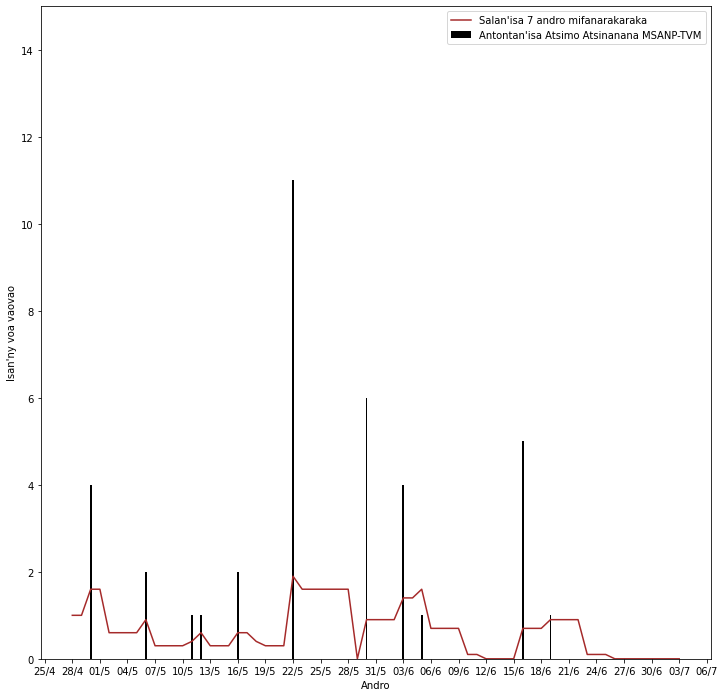

In [270]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaatsitsi.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsitsi.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Atsimo Atsinanana MSANP-TVM")
ax.plot(tilyvoaatsitsi.loc[daty_data_manom:daty_data_mifar].index, tilyvoaatsitsi.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,15)
plt.savefig(path_to_save+'voavaoatsitsizao.eps')
plt.savefig(path_to_save+'voavaoatsitsizao.png')

plt.show()

### Betsiboka

In [271]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoabe.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoabe.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


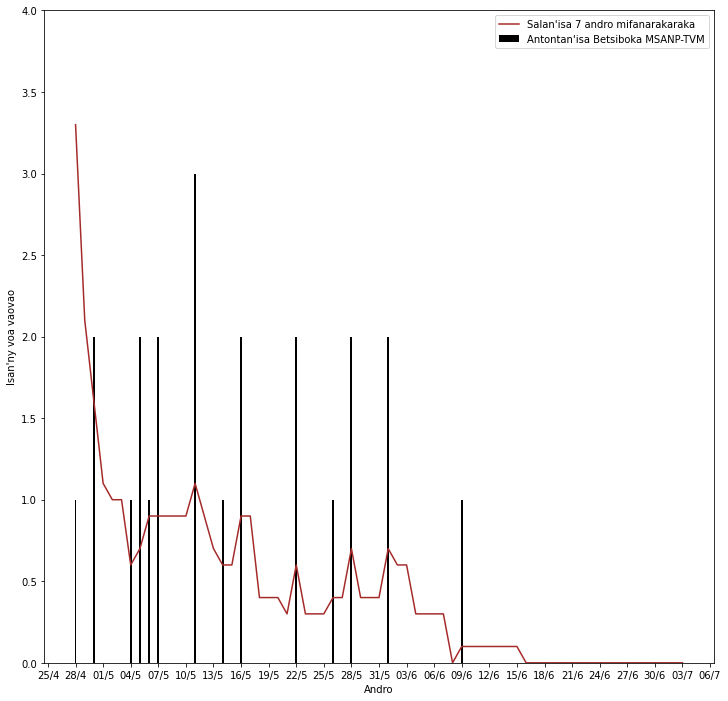

In [272]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoabe.loc[daty_data_manom:daty_data_mifar].index, tilyvoabe.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Betsiboka MSANP-TVM")
ax.plot(tilyvoabe.loc[daty_data_manom:daty_data_mifar].index, tilyvoabe.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,4)
plt.savefig(path_to_save+'voavaobezao.eps')
plt.savefig(path_to_save+'voavaobezao.png')

plt.show()

### Boeny

In [273]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaboe.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoaboe.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


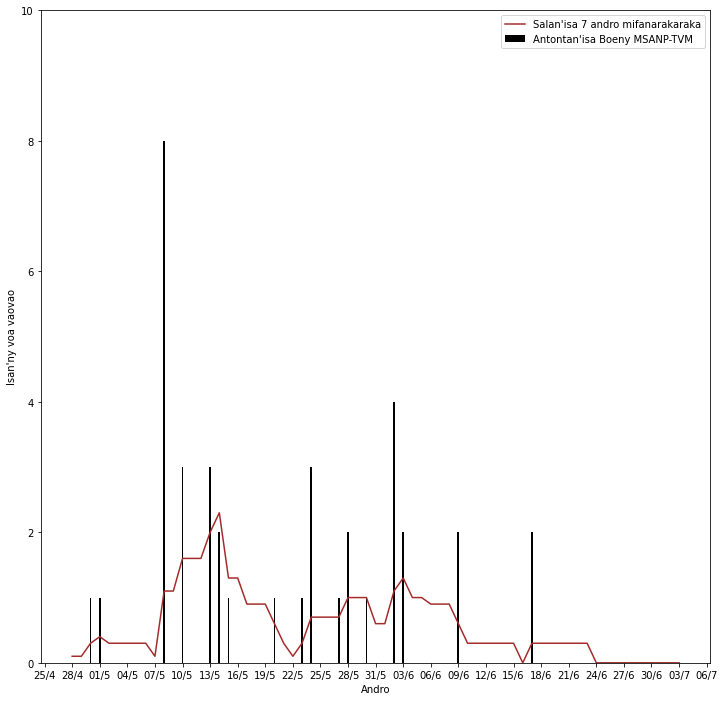

In [274]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaboe.loc[daty_data_manom:daty_data_mifar].index, tilyvoaboe.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Boeny MSANP-TVM")
ax.plot(tilyvoaboe.loc[daty_data_manom:daty_data_mifar].index, tilyvoaboe.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaoboezao.eps')
plt.savefig(path_to_save+'voavaoboezao.png')

plt.show()

### Bongolava

In [275]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoabon.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoabon.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


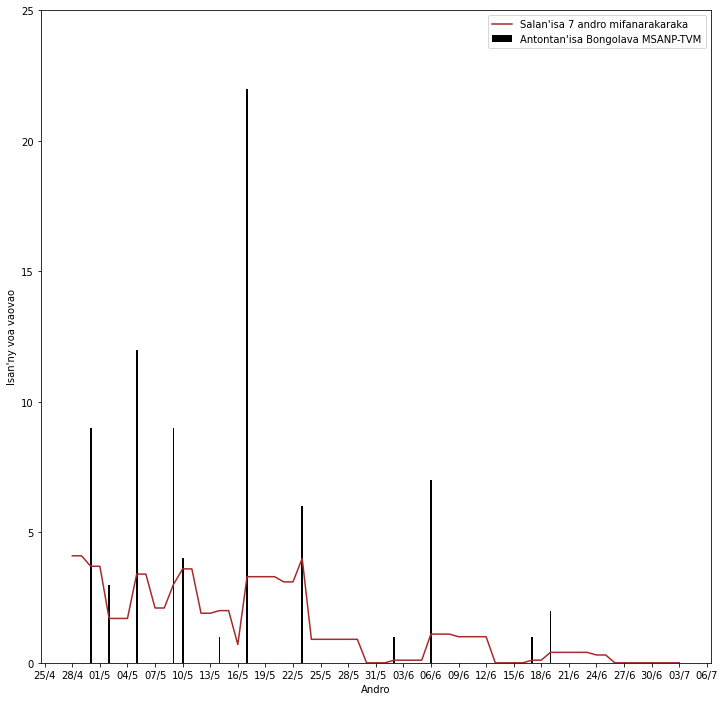

In [276]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoabon.loc[daty_data_manom:daty_data_mifar].index, tilyvoabon.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Bongolava MSANP-TVM")
ax.plot(tilyvoabon.loc[daty_data_manom:daty_data_mifar].index, tilyvoabon.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,25)
plt.savefig(path_to_save+'voavaobonzao.eps')
plt.savefig(path_to_save+'voavaobonzao.png')

plt.show()

### Diana

In [277]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoadia.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoadia.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


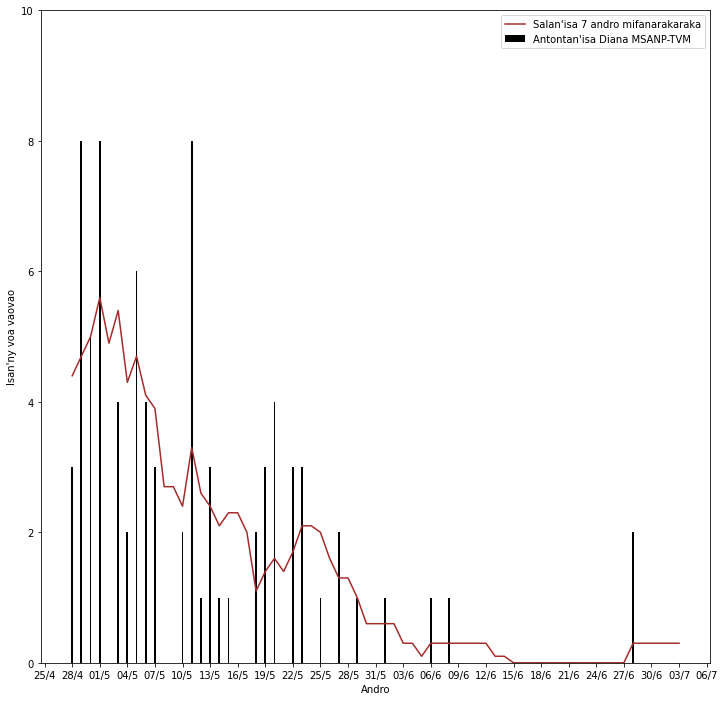

In [278]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoadia.loc[daty_data_manom:daty_data_mifar].index, tilyvoadia.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Diana MSANP-TVM")
ax.plot(tilyvoadia.loc[daty_data_manom:daty_data_mifar].index, tilyvoadia.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaodiazao.eps')
plt.savefig(path_to_save+'voavaodiazao.png')

plt.show()

### Matsiatra Ambony

In [279]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoatsiatr.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoatsiatr.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


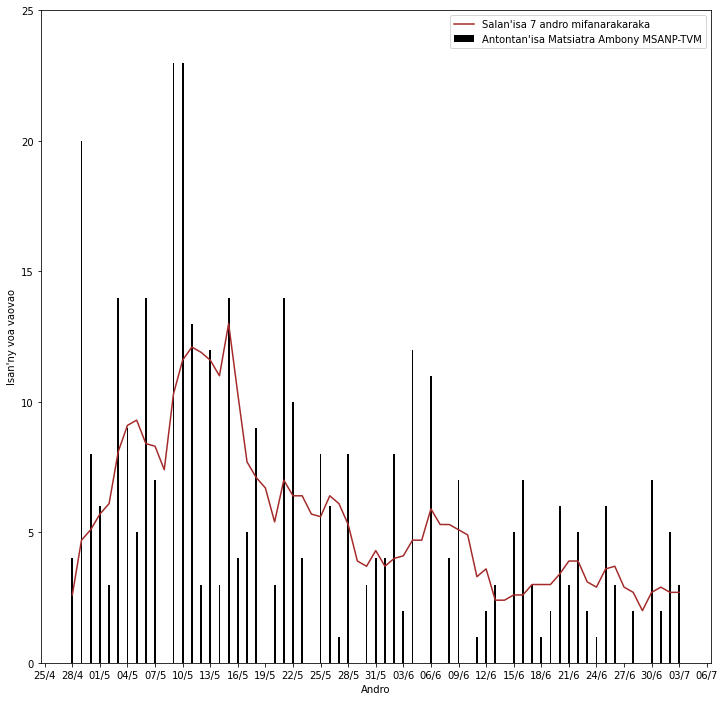

In [280]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatsiatr.loc[daty_data_manom:daty_data_mifar].index, tilyvoatsiatr.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Matsiatra Ambony MSANP-TVM")
ax.plot(tilyvoatsiatr.loc[daty_data_manom:daty_data_mifar].index, tilyvoatsiatr.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,25)
plt.savefig(path_to_save+'voavaotsiatrzao.eps')
plt.savefig(path_to_save+'voavaotsiatrzao.png')

plt.show()

### Ihorombe

In [281]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoahoro.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoahoro.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


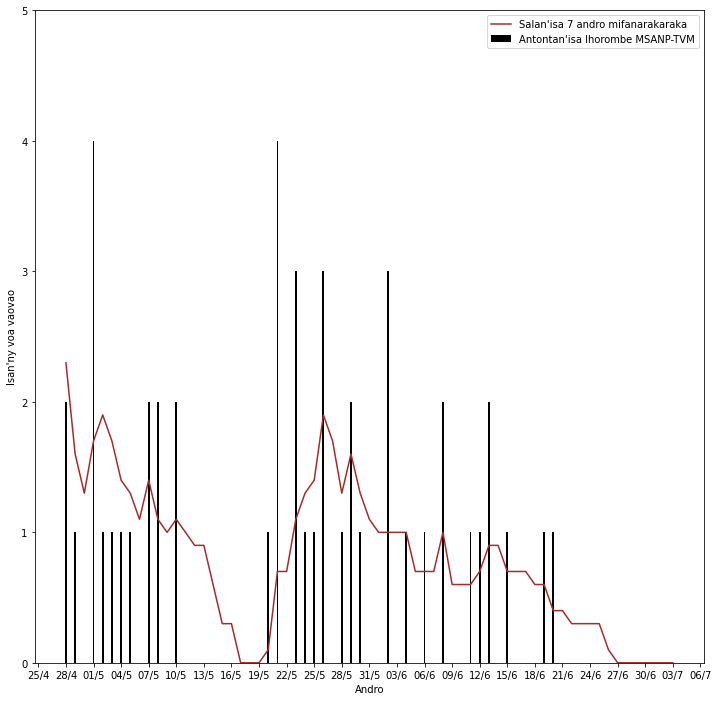

In [282]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoahoro.loc[daty_data_manom:daty_data_mifar].index, tilyvoahoro.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Ihorombe MSANP-TVM")
ax.plot(tilyvoahoro.loc[daty_data_manom:daty_data_mifar].index, tilyvoahoro.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,5)
plt.savefig(path_to_save+'voavaohorozao.eps')
plt.savefig(path_to_save+'voavaohorozao.png')

plt.show()

### Itasy

In [283]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoatasy.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoatasy.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


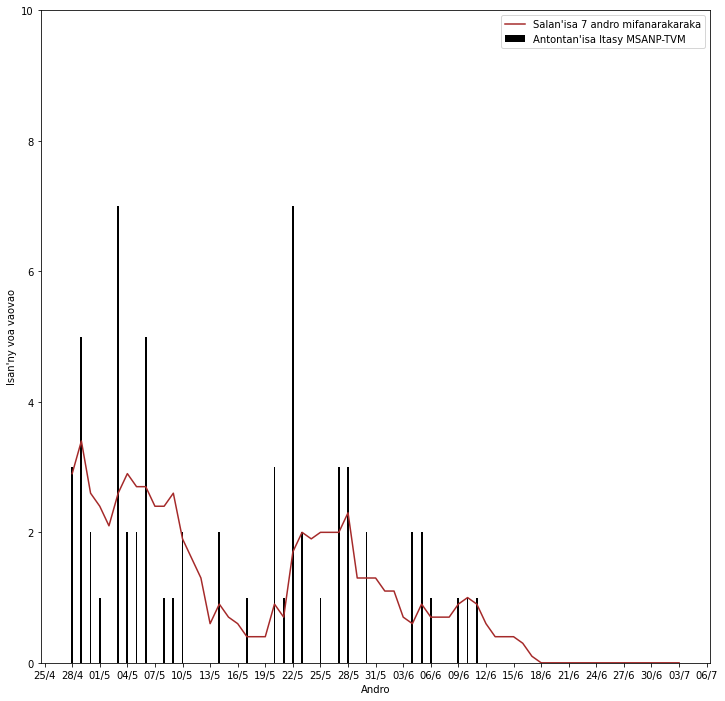

In [284]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatasy.loc[daty_data_manom:daty_data_mifar].index, tilyvoatasy.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Itasy MSANP-TVM")
ax.plot(tilyvoatasy.loc[daty_data_manom:daty_data_mifar].index, tilyvoatasy.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaotasyzao.eps')
plt.savefig(path_to_save+'voavaotasyzao.png')

plt.show()

### Melaky

In [285]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamel.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoamel.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


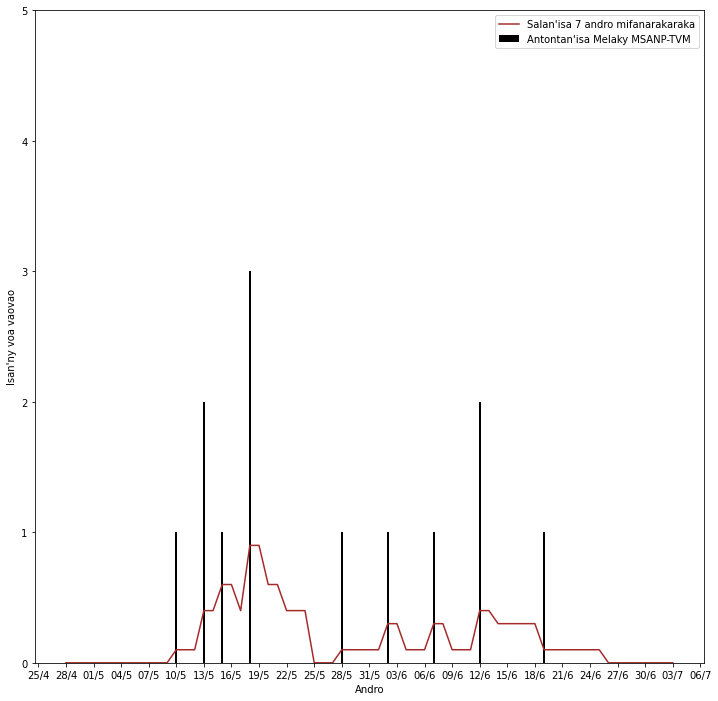

In [286]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamel.loc[daty_data_manom:daty_data_mifar].index, tilyvoamel.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Melaky MSANP-TVM")
ax.plot(tilyvoamel.loc[daty_data_manom:daty_data_mifar].index, tilyvoamel.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,5)
plt.savefig(path_to_save+'voavaomelzao.eps')
plt.savefig(path_to_save+'voavaomelzao.png')

plt.show()

### Menabe

In [287]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamena.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoamena.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


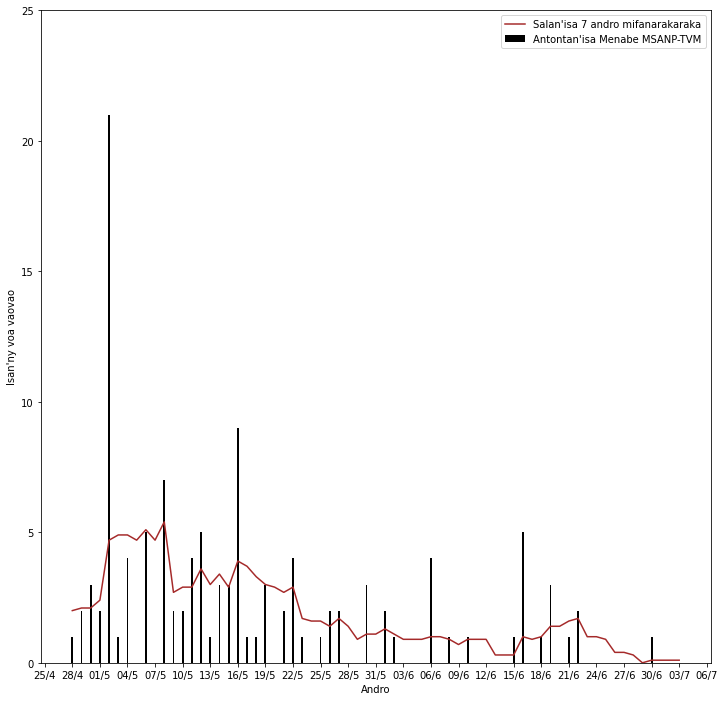

In [288]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamena.loc[daty_data_manom:daty_data_mifar].index, tilyvoamena.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Menabe MSANP-TVM")
ax.plot(tilyvoamena.loc[daty_data_manom:daty_data_mifar].index, tilyvoamena.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,25)
plt.savefig(path_to_save+'voavaomenazao.eps')
plt.savefig(path_to_save+'voavaomenazao.png')

plt.show()

### Sava

In [289]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoasava.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoasava.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


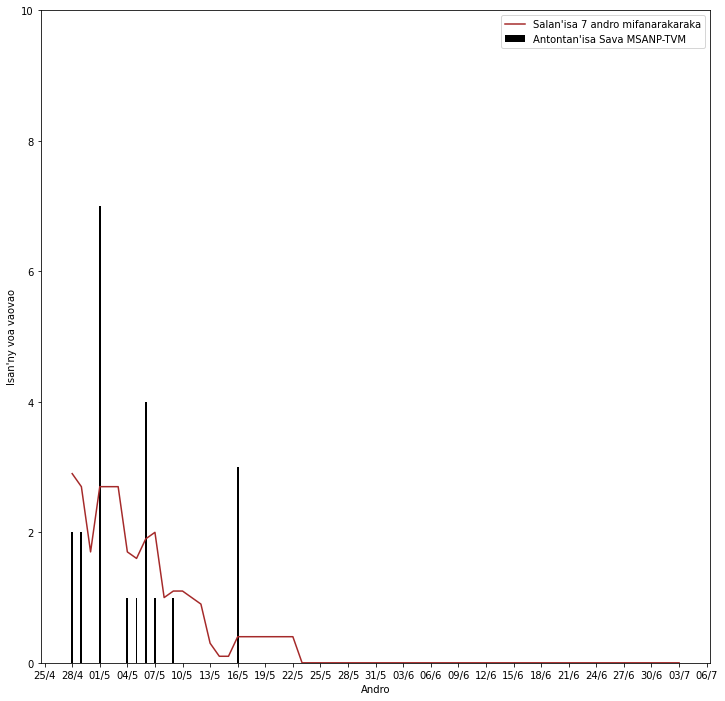

In [290]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoasava.loc[daty_data_manom:daty_data_mifar].index, tilyvoasava.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Sava MSANP-TVM")
ax.plot(tilyvoasava.loc[daty_data_manom:daty_data_mifar].index, tilyvoasava.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10)
plt.savefig(path_to_save+'voavaosavazao.eps')
plt.savefig(path_to_save+'voavaosavazao.png')

plt.show()

### Sofia

In [291]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoasofi.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoasofi.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


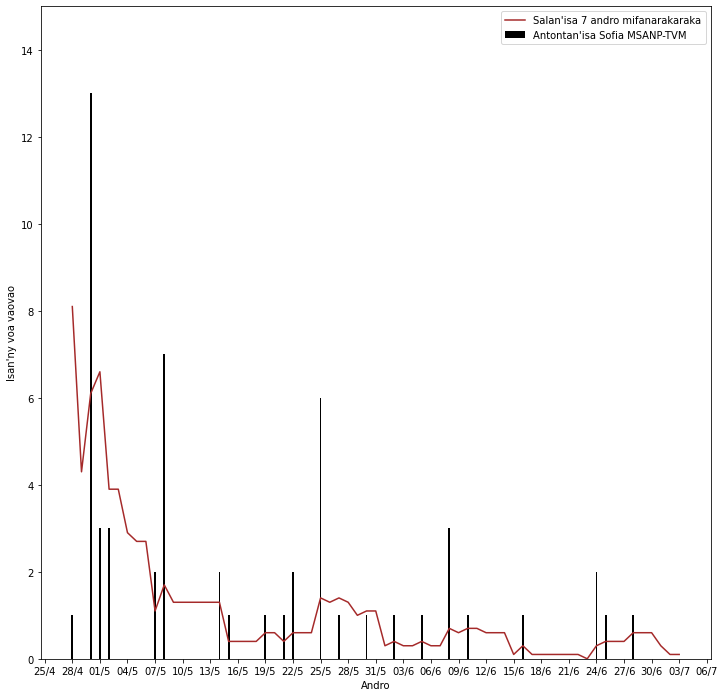

In [292]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoasofi.loc[daty_data_manom:daty_data_mifar].index, tilyvoasofi.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Sofia MSANP-TVM")
ax.plot(tilyvoasofi.loc[daty_data_manom:daty_data_mifar].index, tilyvoasofi.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,15)
plt.savefig(path_to_save+'voavaosofizao.eps')
plt.savefig(path_to_save+'voavaosofizao.png')

plt.show()

### Vakinakaratra

In [293]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoakara.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoakara.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


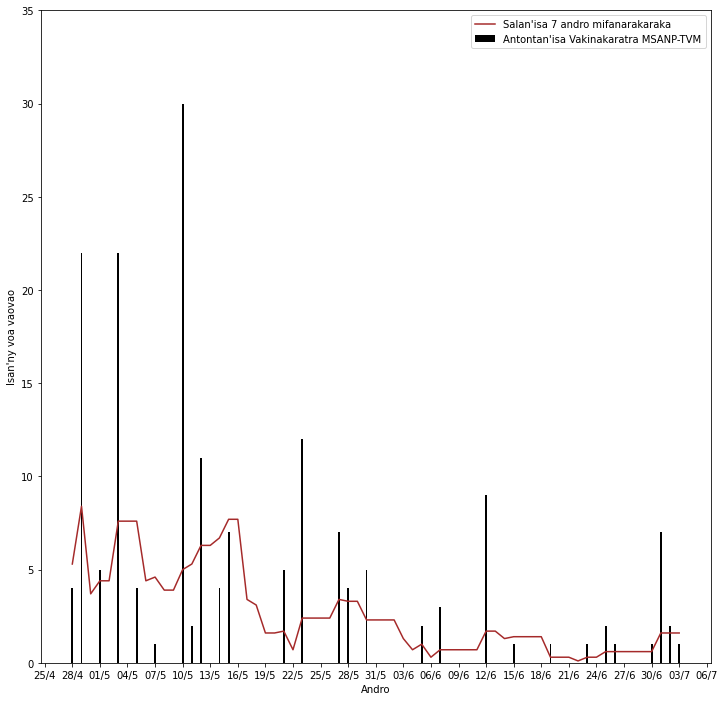

In [294]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoakara.loc[daty_data_manom:daty_data_mifar].index, tilyvoakara.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Vakinakaratra MSANP-TVM")
ax.plot(tilyvoakara.loc[daty_data_manom:daty_data_mifar].index, tilyvoakara.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,35)
plt.savefig(path_to_save+'voavaokarazao.eps')
plt.savefig(path_to_save+'voavaokarazao.png')

plt.show()

### Vatovavy Fitovinany

In [295]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoavavy.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voatomb']
  tilyvoavavy.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


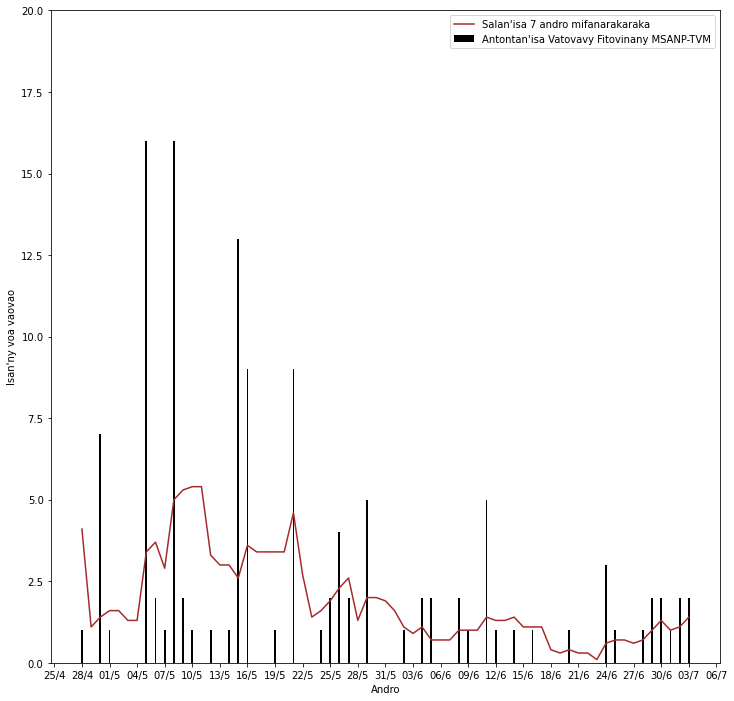

In [296]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoavavy.loc[daty_data_manom:daty_data_mifar].index, tilyvoavavy.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Vatovavy Fitovinany MSANP-TVM")
ax.plot(tilyvoavavy.loc[daty_data_manom:daty_data_mifar].index, tilyvoavavy.loc[daty_data_manom:daty_data_mifar,'Voatomb_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
plt.savefig(path_to_save+'voavaovavyzao.eps')
plt.savefig(path_to_save+'voavaovavyzao.png')

plt.show()

# Voa rehetra

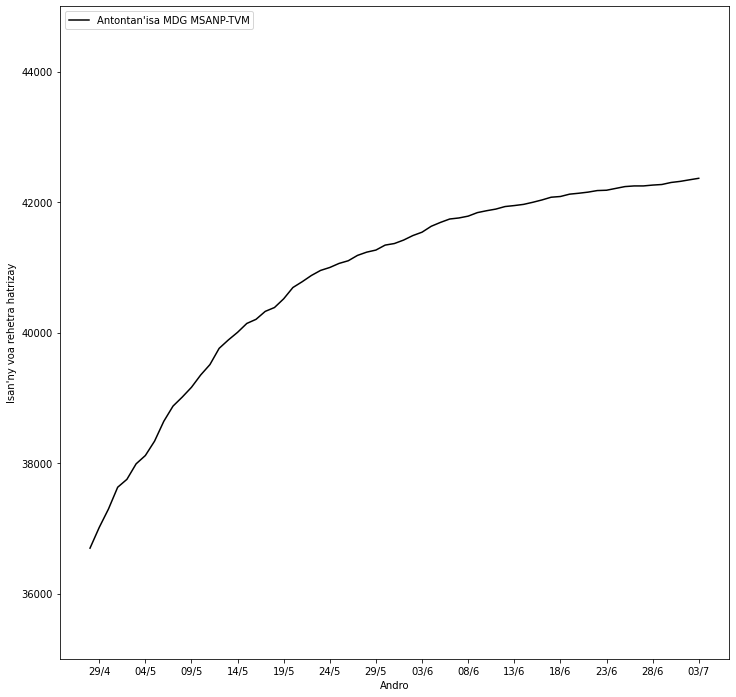

In [297]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voareh tvm'], color='black',label="Antontan'isa MDG MSANP-TVM")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.legend(loc= 'upper left')

plt.ylim(35000,45000)
#plt.savefig(path_to_save+'voarehzao.eps')
#plt.savefig(path_to_save+'voarehzao.png')

plt.show()

### Kenya

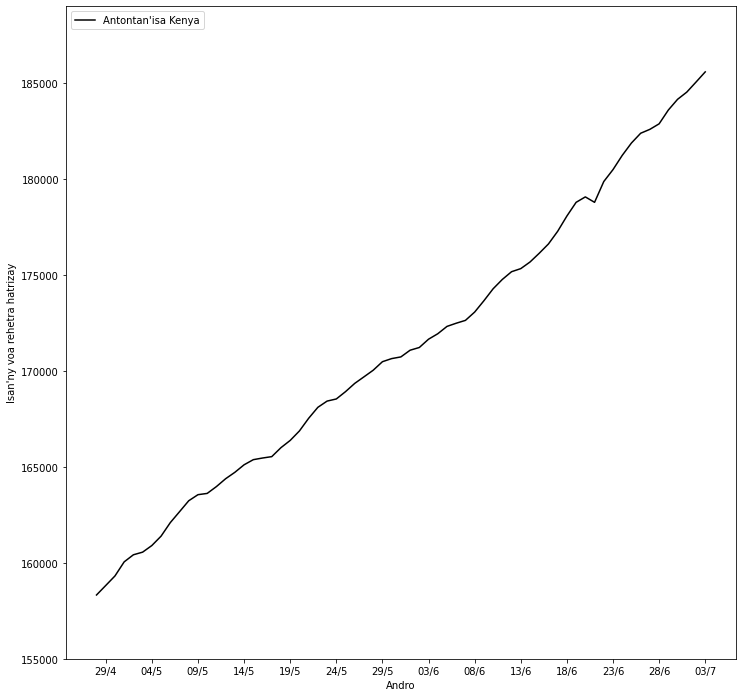

In [298]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voareh tomb'], color='black',label="Antontan'isa Kenya")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.legend(loc= 'upper left')

plt.ylim(155000,189000)
#plt.savefig(path_to_save+'voarehzaoken.eps')
#plt.savefig(path_to_save+'voarehzaoken.png')

plt.show()

### Afrika Atsimo

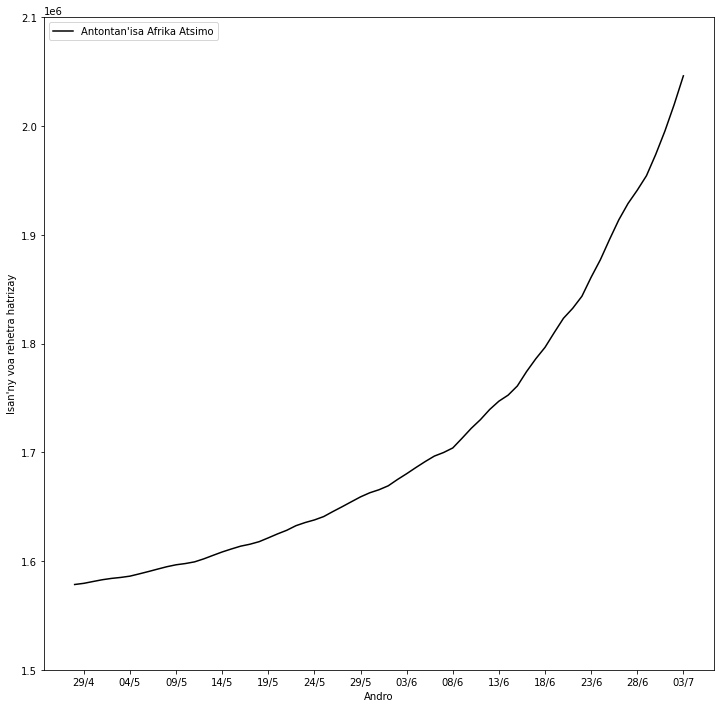

In [299]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voareh'], color='black',label="Antontan'isa Afrika Atsimo")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.legend(loc= 'upper left')

plt.ylim(1500000,2100000)
#plt.savefig(path_to_save+'voarehzaosaf.eps')
#plt.savefig(path_to_save+'voarehzaosaf.png')

plt.show()

## Ireo sitrana hatrizay

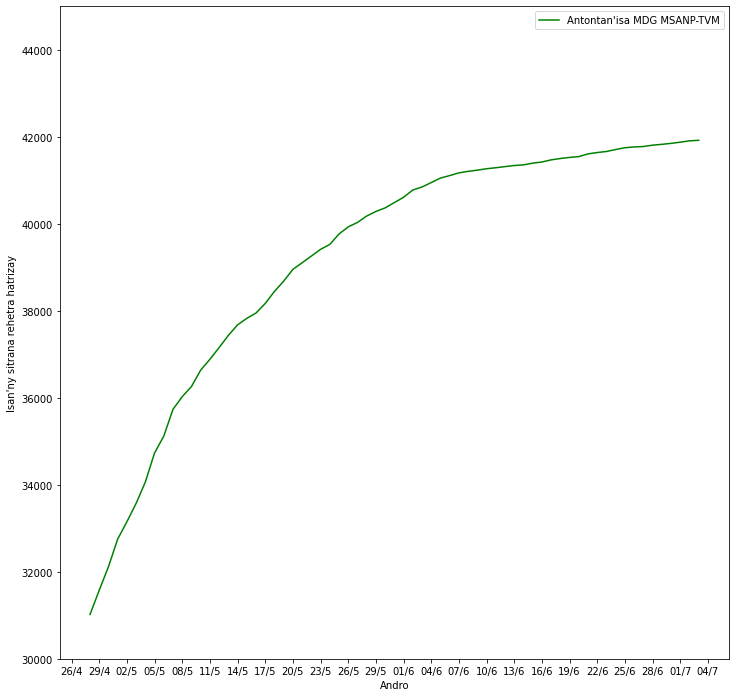

In [300]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Sitranreh tvm'], color='green',label="Antontan'isa MDG MSANP-TVM")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(30000,45000)
#plt.savefig(path_to_save+'sitrrehzao.eps')
#plt.savefig(path_to_save+'sitrrehzao.png')

plt.show()

### Kenya

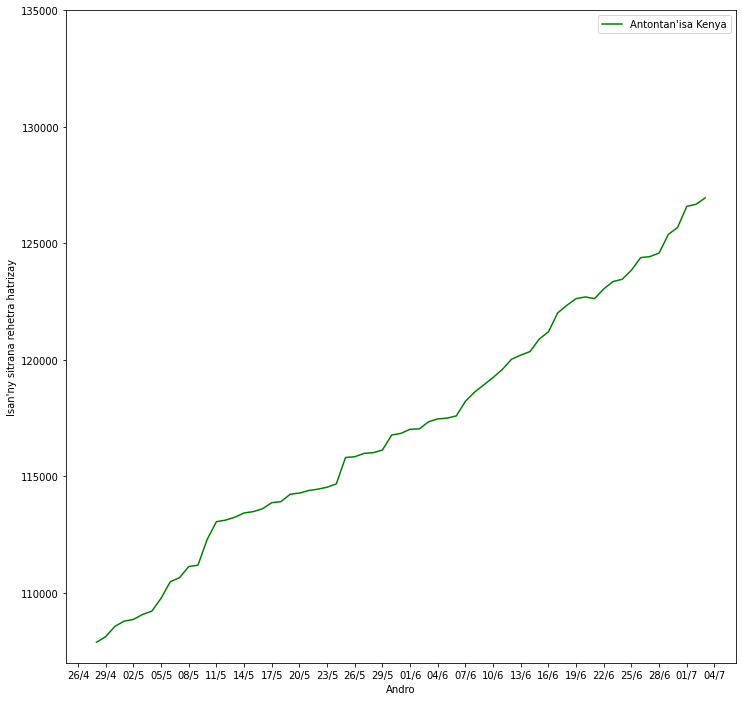

In [301]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar, 'Sitranreh'], color='green',label="Antontan'isa Kenya")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(107000,135000)
#plt.savefig(path_to_save+'sitrrehzaoken.eps')
#plt.savefig(path_to_save+'sitrrehzaoken.png')

plt.show()

### Afrika Atsimo

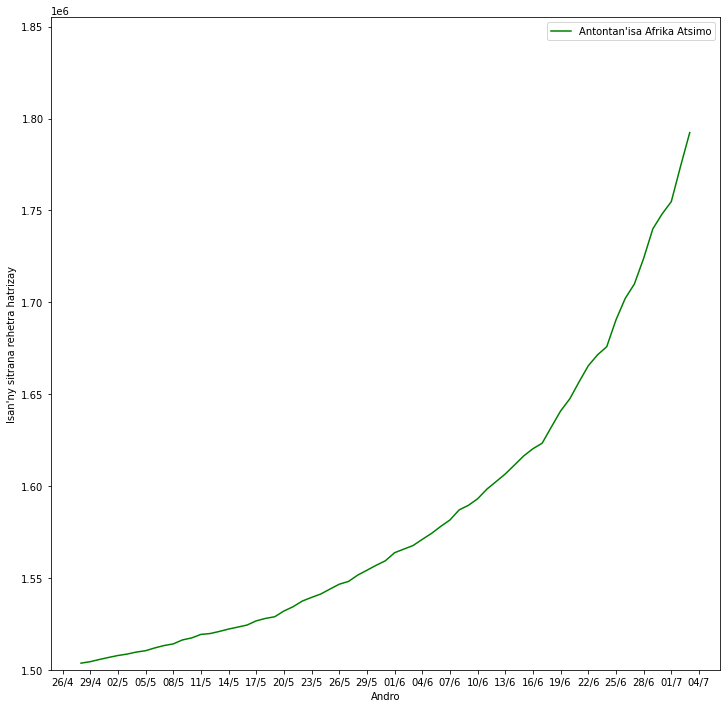

In [302]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar, 'Sitranreh'], color='green',label="Antontan'isa Afrika Atsimo")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(1500000,1855000)
#plt.savefig(path_to_save+'sitrrehzaosaf.eps')
#plt.savefig(path_to_save+'sitrrehzaosaf.png')

plt.show()

## Ireo sitrana vaovao

In [303]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Sitranvao tvm']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


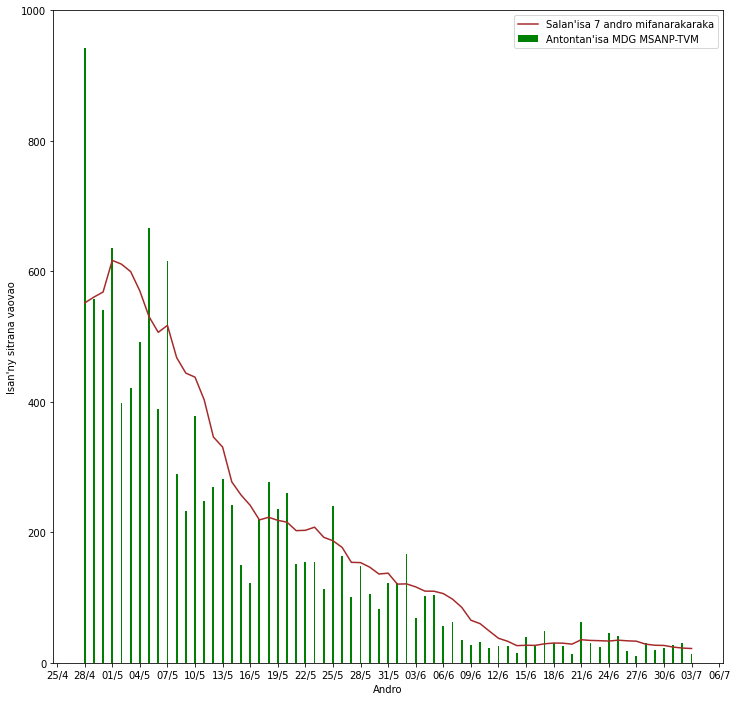

In [304]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao tvm'], width=0.2, color='green',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1000)
#plt.savefig(path_to_save+'sitrvaozao.eps')

plt.show()

In [305]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Sitranvao tvm']
  tilyvoaanala.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


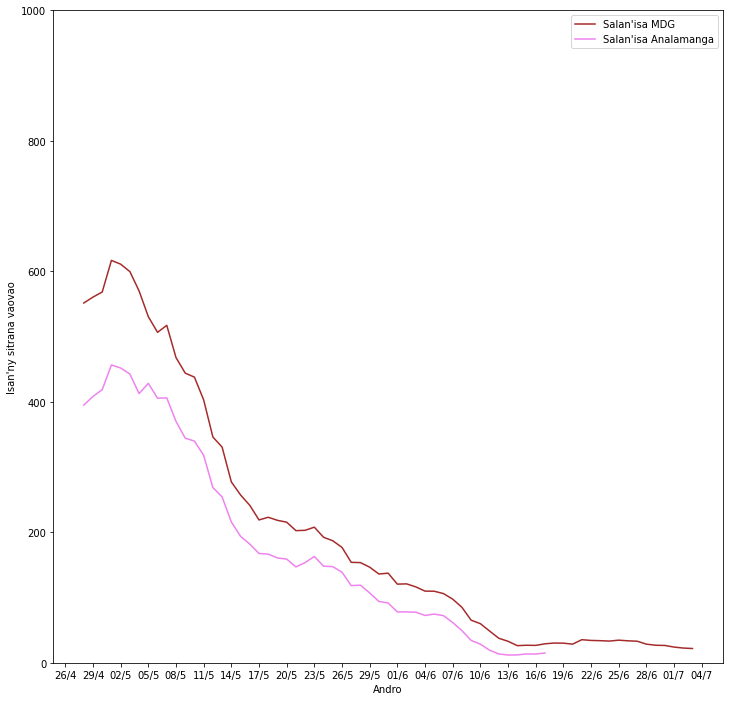

In [306]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='brown',label="Salan'isa MDG")
ax.plot(tilyvoaanala.loc[daty_data_manom:daty_data_mifar].index, tilyvoaanala.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='violet',label="Salan'isa Analamanga")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1000)
#plt.savefig(path_to_save+'sitrvaozaomdganala.eps')

plt.show()

### Sitrana vaovao tanaty 7 andro mifanarakaraka

In [307]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Sitranvao tvm']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitrtan_7'] = voat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Kenya

In [308]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Sitranvao']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


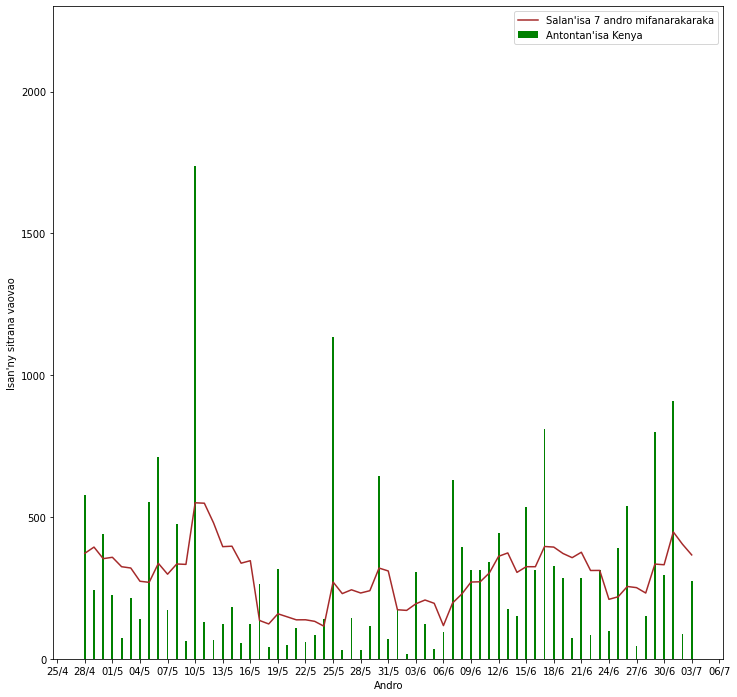

In [309]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranvao'], width=0.2, color='green',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,2300)
#plt.savefig(path_to_save+'sitrvaozaoken.eps')

plt.show()

### Afrika Atsimo

In [310]:
for i in range((daty_data_mifar - daty_data_manom).days +1+7):
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Sitranvao'] = tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Sitranreh'] - tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1-7)),'Sitranreh']  

In [311]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Sitranvao']
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao_7'] = np.round(voat/7,1)

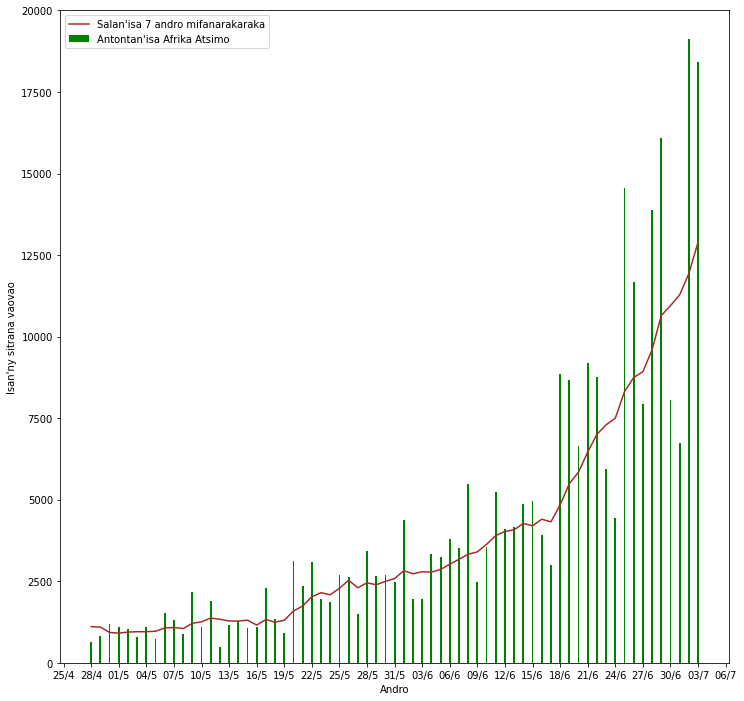

In [312]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranvao'], width=0.2, color='green',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20000)
#plt.savefig(path_to_save+'sitrvaozaosaf.eps')

plt.show()

### Fampitaha

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


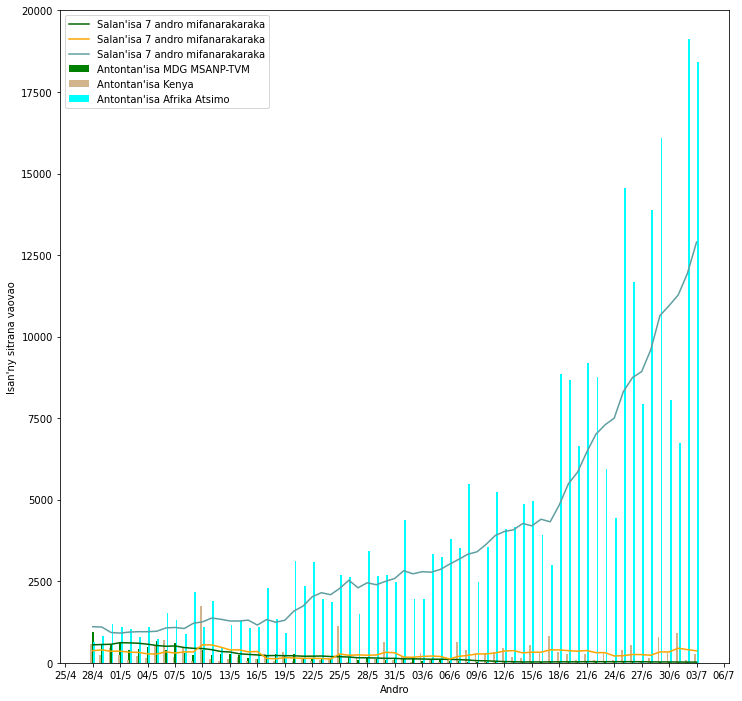

In [313]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao tvm'], width=0.2, color='green',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='darkgreen',label="Salan'isa 7 andro mifanarakaraka")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranvao'], width=0.2, color='tan',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='orange',label="Salan'isa 7 andro mifanarakaraka")

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranvao'], width=0.2, color='cyan',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranvao_7'], color='cadetblue',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20000)
plt.savefig(path_to_save+'sitrvaozaomdgkensaf.eps')
plt.savefig(path_to_save+'sitrvaozaomdgkensaf.png')

plt.show()

## Ireo nodimandry hatrizay 

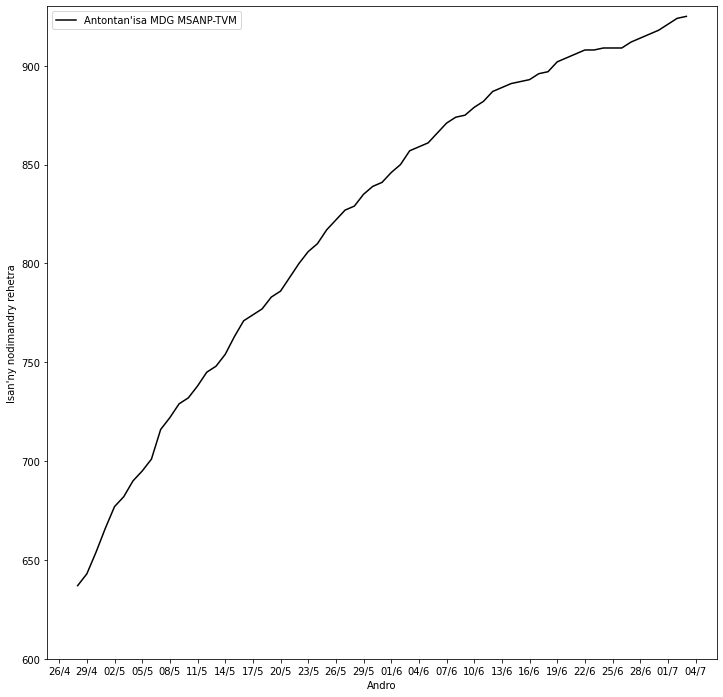

In [314]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Nodimandry reh'], color='black',label="Antontan'isa MDG MSANP-TVM")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry rehetra")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(600,930)
#plt.savefig(path_to_save+'nodirehzao.eps')
#plt.savefig(path_to_save+'nodirehzao.png')

plt.show()

### Kenya

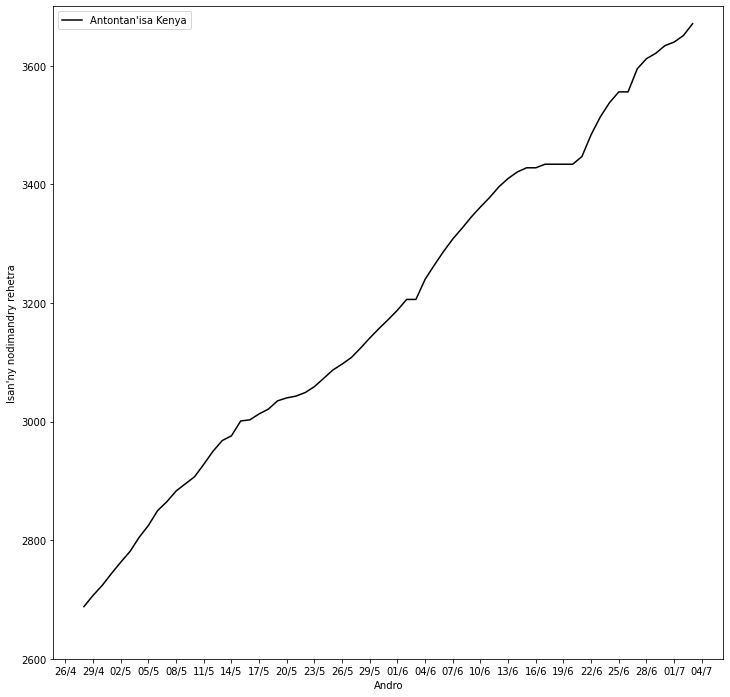

In [315]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar, 'Nodimandry reh'], color='black',label="Antontan'isa Kenya")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry rehetra")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(2600,3700)
#plt.savefig(path_to_save+'nodirehzaoken.eps')
#plt.savefig(path_to_save+'nodirehzaoken.png')

plt.show()

### Afrika Atsimo

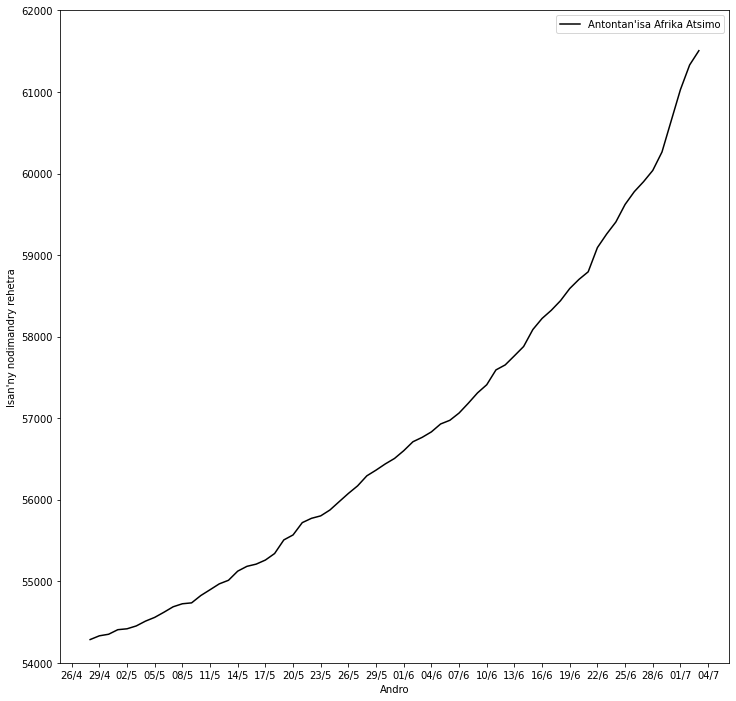

In [316]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar, 'Nodimandry reh'], color='black',label="Antontan'isa Afrika Atsimo")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry rehetra")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(54000,62000)
#plt.savefig(path_to_save+'nodirehzaosaf.eps')
#plt.savefig(path_to_save+'nodirehzaosaf.png')

plt.show()

## Ireo nodimandry vaovao

### Salan'isa nodimandry

In [317]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Nodimandry vao']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodivao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


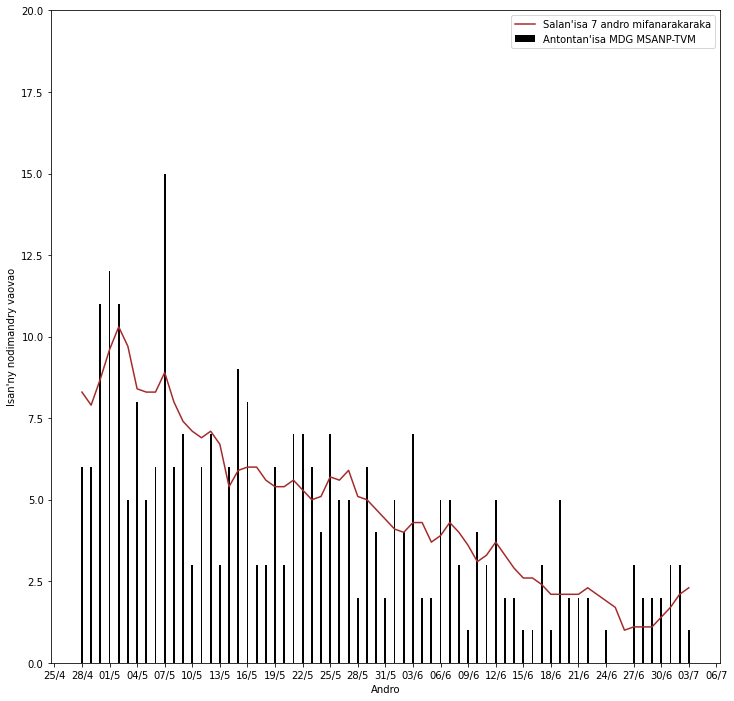

In [318]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,20)
#plt.savefig(path_to_save+'nodivaozao.eps')

plt.show()

### Nodimandry vaovao tanaty 7 andro mifanarakaraka

In [319]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Nodimandry vao']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Noditan_7'] = voat

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


### Kenya

In [320]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Nodimandry vao']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodivao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


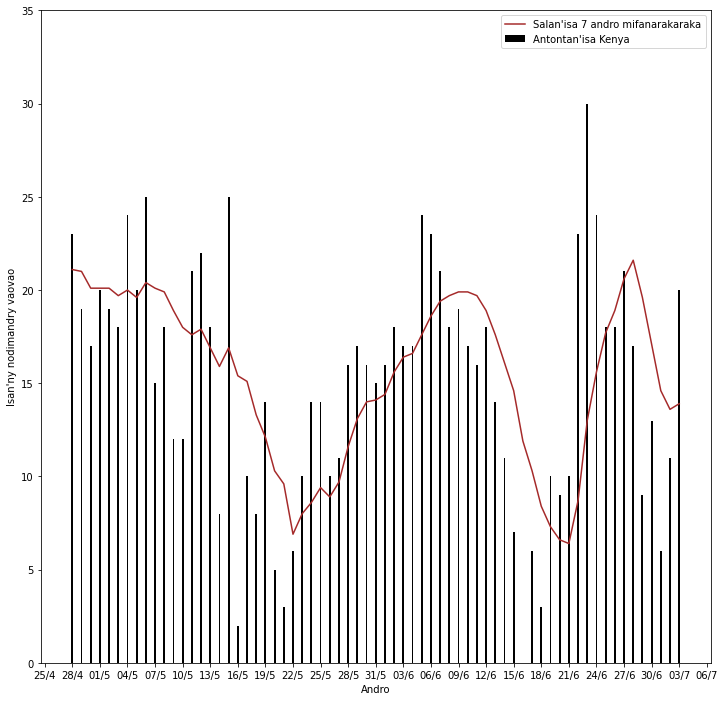

In [321]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='black',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,35)
#plt.savefig(path_to_save+'nodivaozaoken.eps')

plt.show()

### Afrika Atsimo

In [322]:
for i in range((daty_data_mifar - daty_data_manom).days +1+7):
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Nodimandry vao'] = tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-7)),'Nodimandry reh'] - tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1-7)),'Nodimandry reh']  

In [323]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Nodimandry vao']
  tilyvoasaf.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodivao_7'] = np.round(voat/7,1)

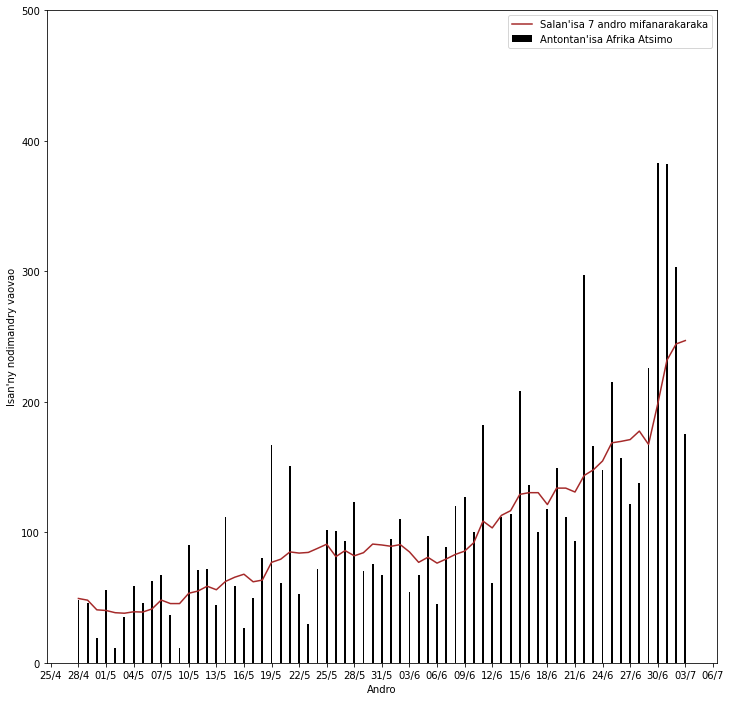

In [324]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='black',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,500)
#plt.savefig(path_to_save+'nodivaozaosaf.eps')

plt.show()

### Fampitaha

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


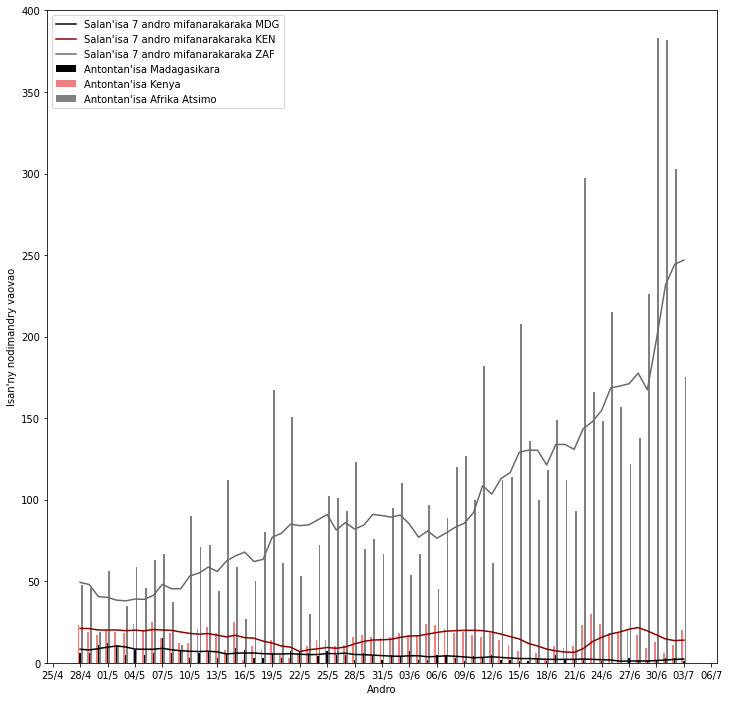

In [325]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='black',label="Antontan'isa Madagasikara")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color= 'black',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='lightcoral',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color='darkred',label="Salan'isa 7 andro mifanarakaraka KEN")

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodimandry vao'], width=0.2, color='grey',label="Antontan'isa Afrika Atsimo")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodivao_7'], color='dimgrey',label="Salan'isa 7 andro mifanarakaraka ZAF")

ax.set(xlabel ='Andro', ylabel = "Isan'ny nodimandry vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,400)
#plt.savefig(path_to_save+'nodivaozaomdgkensaf.eps')
#plt.savefig(path_to_save+'nodivaozaomdgkensaf.png')

plt.show()

# Tahan'ny sitrana hatrizay oharina amin'ny voa hatrizay

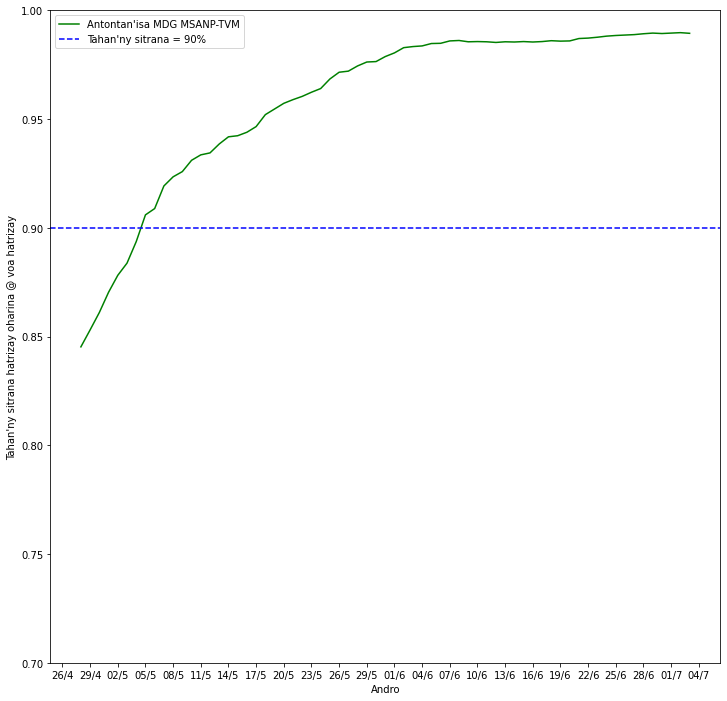

In [326]:

fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='green',label="Antontan'isa MDG MSANP-TVM")
#ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='lightseagreen',label="Antontan'isa Kenya")
ax.axhline(y=0.9, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 90%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0.7,1)
#plt.savefig(path_to_save+'tahasitrzao.eps')
#plt.savefig(path_to_save+'tahasitrzao.png')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


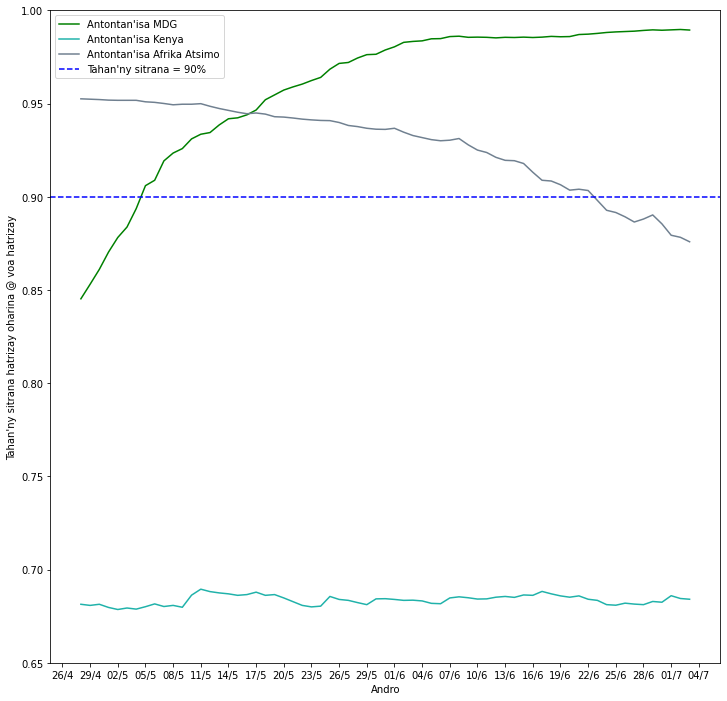

In [327]:

fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='green',label="Antontan'isa MDG")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='lightseagreen',label="Antontan'isa Kenya")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='slategrey',label="Antontan'isa Afrika Atsimo")
ax.axhline(y=0.9, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 90%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0.65,1)
plt.savefig(path_to_save+'tahasitrzaomdgkensaf.eps')
plt.savefig(path_to_save+'tahasitrzaomdgkensaf.png')
plt.show()

### lehibe sy kely amin'ireo tahan'ny sitrana

In [328]:
# Mametraka ny marika 'tahabe' na 'tahakely' arakaraka ny tahan'ny sitrana

tilyvoamdg['Mombatahasitr'] = np.where(tilyvoamdg['Tahasitr']>=0.9, 'tahabe', 'tahakely')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


## Tahan'ny nodimandry hatrizay oharina amin'ny voa hatrizay

In [329]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Tahanodi'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry reh']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voareh tvm']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [330]:
tilyvoaken.loc[daty_data_manom:daty_data_mifar ,'Tahanodi']

Daty
2021-04-28    0.0170
2021-04-29    0.0170
2021-04-30    0.0171
2021-05-01    0.0171
2021-05-02    0.0172
               ...  
2021-06-29    0.0197
2021-06-30    0.0197
2021-07-01    0.0197
2021-07-02    0.0197
2021-07-03    0.0198
Name: Tahanodi, Length: 67, dtype: float64

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


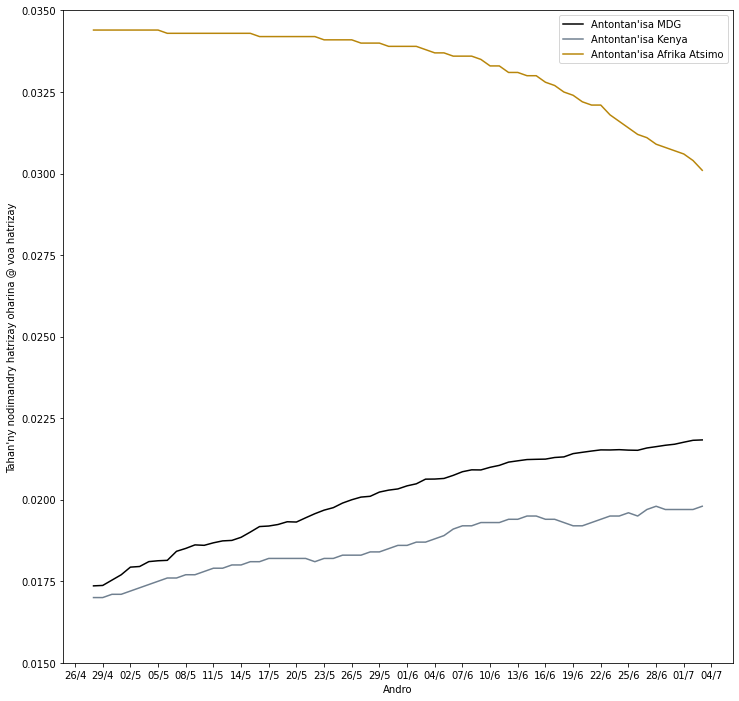

In [331]:

fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahanodi'], color='black',label="Antontan'isa MDG")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar ,'Tahanodi'], color='slategrey',label="Antontan'isa Kenya")
ax.plot(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index, tilyvoasaf.loc[daty_data_manom:daty_data_mifar ,'Tahanodi'], color='darkgoldenrod',label="Antontan'isa Afrika Atsimo")
#ax.axhline(y=0.01, color='b', linestyle='dashed', label ="Tahan'ny nodimandry = 0.1%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny nodimandry hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0.015,0.035)
plt.savefig(path_to_save+'tahanodizao.eps')
plt.savefig(path_to_save+'tahanodizao.png')
plt.show()

## Ireo voa tanaty fotoana voafaritra manome ireo sitrana afaka fotoana voatondro

In [332]:
# Fitambaran'ireo sitrana vaovao tanaty fotoana voatondro (= tanaty_andr)

tanaty_andr = 3

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < tanaty_andr -1:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Sitranvao tvm']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitr_tan'] = sitran
  else:
    sitr = 0
    for j in range(tanaty_andr):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Sitranvao tvm']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitr_tan'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [333]:
# Tahan'ny sitrana tanaty 7 andro oharina amin'ny voa tanaty 7 andro
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)


fahar_aretin = 10

daty_h_lst = []

voa_her = []
sitr_herf = []


for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
  t = daty_data_manom + datetime.timedelta(days = tanaty_andr - 1 + fahar_aretin + i) 
  daty = formatf_date(t)
  voa_amboar = tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + i)),'Voatan_7']
  sitr_amboar = tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'Sitr_tan']
  daty_h_lst.append(t)
  voa_her.append(voa_amboar)
  sitr_herf.append(sitr_amboar)

In [334]:
Sitrvoadatah = pd.DataFrame(columns =['datyh','voah','sitrh'])
for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
    Sitrvoadatah.loc[i] = [daty_h_lst[i],voa_her[i], sitr_herf[i]]

Sitrvoadatah['Thsitrh'] = Sitrvoadatah['sitrh']/Sitrvoadatah['voah']

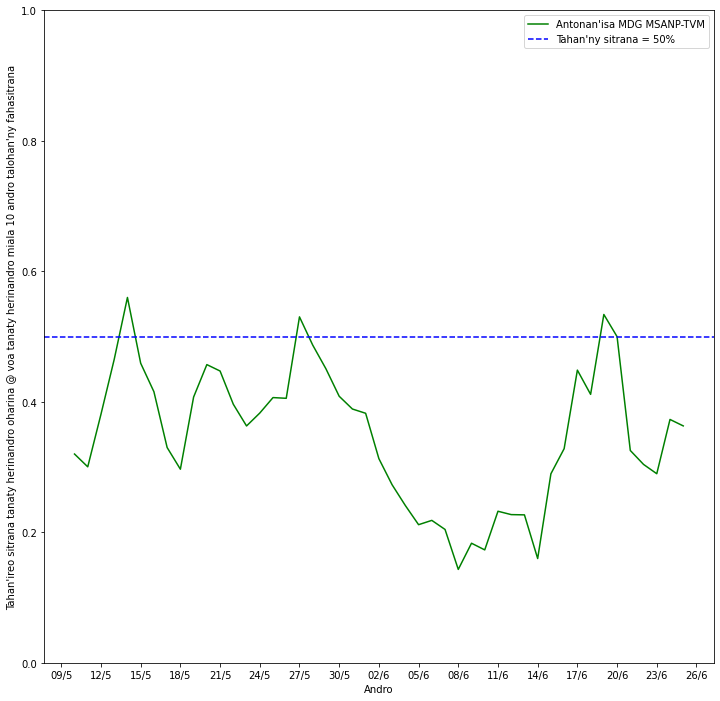

In [335]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(Sitrvoadatah['datyh'], Sitrvoadatah['Thsitrh'], color='green',label="Antonan'isa MDG MSANP-TVM")
ax.axhline(y=0.5, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 50%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo sitrana tanaty herinandro oharina @ voa tanaty herinandro miala 10 andro talohan'ny fahasitrana")


date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1)
#plt.savefig(path_to_save+'thsitrh.eps')
#plt.savefig(path_to_save+'thsitrh.png')

plt.show()

### Kenya

In [336]:
# Fitambaran'ireo sitrana vaovao tanaty fotoana voatondro (= tanaty_andr)

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < tanaty_andr -1:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Sitranvao']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitr_tan'] = sitran
  else:
    sitr = 0
    for j in range(tanaty_andr):
      sitr = sitr + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Sitranvao']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitr_tan'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [337]:
# Tahan'ny voa tanaty 7 andro oharina amin'ny voa tanaty 7 andro
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

voaken_her = []
sitrken_herf = []


for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
  voa_amboar = tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + i)),'Voatan_7']
  sitr_amboar = tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'Sitr_tan']
  voaken_her.append(voa_amboar)
  sitrken_herf.append(sitr_amboar)

In [338]:
Sitrvoadatahken = pd.DataFrame(columns =['datyh','voahken','sitrhken'])
for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
    Sitrvoadatahken.loc[i] = [daty_h_lst[i],voaken_her[i], sitrken_herf[i]]

Sitrvoadatahken['Thsitrhken'] = Sitrvoadatahken['sitrhken']/Sitrvoadatahken['voahken']

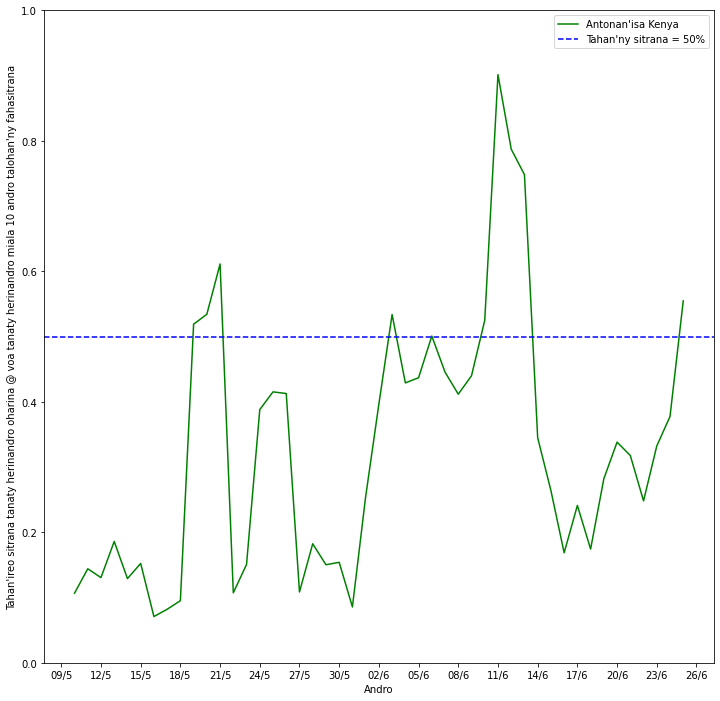

In [339]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(Sitrvoadatahken['datyh'], Sitrvoadatahken['Thsitrhken'], color='green',label="Antonan'isa Kenya")
ax.axhline(y=0.5, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 50%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo sitrana tanaty herinandro oharina @ voa tanaty herinandro miala 10 andro talohan'ny fahasitrana")


date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1)
#plt.savefig(path_to_save+'thsitrhken.eps')
#plt.savefig(path_to_save+'thsitrhken.png')

plt.show()

### fahar_aretin = 0

In [340]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsitrtan7'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitrtan_7']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_7']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


## Ireo voa tanaty fotoana voafaritra manome ireo nodimandry afaka fotoana voatondro

In [341]:
# Fitambaran'ireo nodimandry vaovao tanaty fotoana voatondro (= tanaty_andr)

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < tanaty_andr -1:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Nodimandry vao']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodi_tan'] = sitran
  else:
    sitr = 0
    for j in range(tanaty_andr):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Nodimandry vao']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodi_tan'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [342]:
# Tahan'ny nodimandry tanaty 7 andro oharina amin'ny voa tanaty 7 andro
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

thvoa100_her = []
nodi_herf = []

for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
  nodi_amboar = tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'Nodi_tan']
  thvoa100_amboar = tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'thvoatomb_7']*100
  thvoa100_her.append(thvoa100_amboar)
  nodi_herf.append(nodi_amboar)

In [343]:
Nodivoadatah = pd.DataFrame(columns =['datyh','voah','nodih', 'thvoa100'])
for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
    Nodivoadatah.loc[i] = [daty_h_lst[i],voa_her[i], nodi_herf[i],thvoa100_her[i]]

Nodivoadatah['Thnodih'] = Nodivoadatah['nodih']/Nodivoadatah['voah']

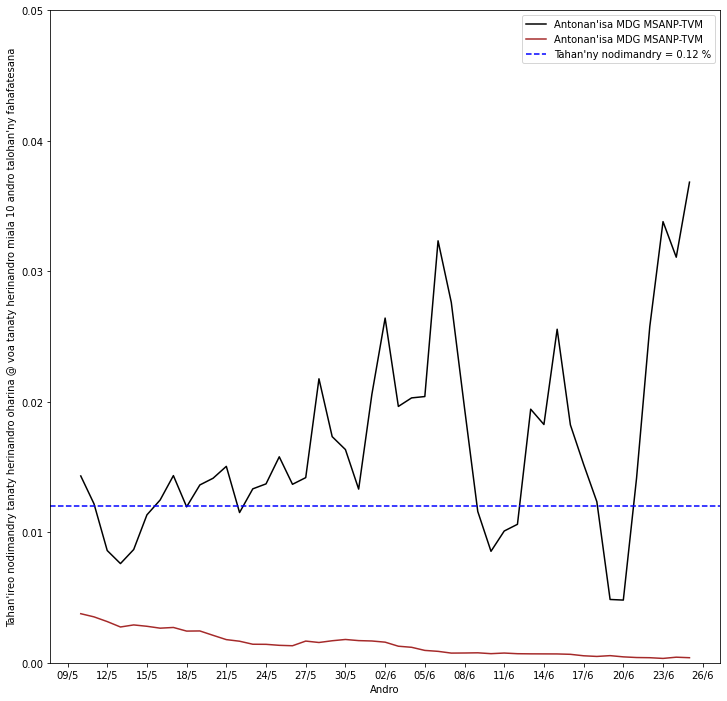

In [344]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(Nodivoadatah['datyh'], Nodivoadatah['Thnodih'], color='black',label="Antonan'isa MDG MSANP-TVM")
ax.plot(Nodivoadatah['datyh'], Nodivoadatah['thvoa100'], color='brown',label="Antonan'isa MDG MSANP-TVM")
ax.axhline(y=0.012, color='b', linestyle='dashed', label ="Tahan'ny nodimandry = 0.12 %")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo nodimandry tanaty herinandro oharina @ voa tanaty herinandro miala 10 andro talohan'ny fahafatesana")


date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.05)
#plt.savefig(path_to_save+'thnodih.eps')
#plt.savefig(path_to_save+'thnodih.png')

plt.show()

### Kenya

In [345]:
# Fitambaran'ireo nodimandry vaovao tanaty fotoana voatondro (= tanaty_andr)

for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < tanaty_andr -1:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Nodimandry vao']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodi_tan'] = sitran
  else:
    sitr = 0
    for j in range(tanaty_andr):
      sitr = sitr + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Nodimandry vao']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodi_tan'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [346]:
# Tahan'ny nodimandry tanaty 7 andro oharina amin'ny voa tanaty 7 andro
formatf_date = lambda date_py: '{}/{}'.format(date_py.day, date_py.month)

thvoaken100_her = []
nodiken_herf = []

for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
  nodiken_amboar = tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'Nodi_tan']
  thvoaken100_amboar = tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 6 + fahar_aretin + tanaty_andr - 1 + i)),'thvoatomb_7']*100
  thvoaken100_her.append(thvoaken100_amboar)
  nodiken_herf.append(nodiken_amboar)

In [347]:
Nodivoadatahken = pd.DataFrame(columns =['datyh','voah','nodih', 'thvoa100'])
for i in range((daty_data_mifar - daty_data_manom).days - fahar_aretin - 6 - tanaty_andr):
    Nodivoadatahken.loc[i] = [daty_h_lst[i],voaken_her[i], nodiken_herf[i], thvoaken100_her[i]]

Nodivoadatahken['Thnodih'] = Nodivoadatahken['nodih']/Nodivoadatahken['voah']

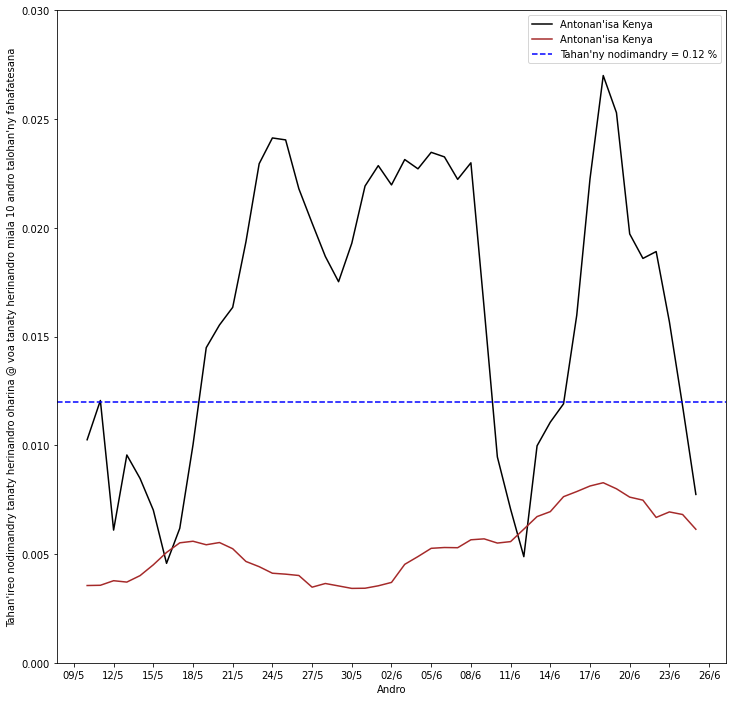

In [348]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(Nodivoadatahken['datyh'], Nodivoadatahken['Thnodih'], color='black',label="Antonan'isa Kenya")
ax.plot(Nodivoadatahken['datyh'], Nodivoadatahken['thvoa100'], color='brown',label="Antonan'isa Kenya")
ax.axhline(y=0.012, color='b', linestyle='dashed', label ="Tahan'ny nodimandry = 0.12 %")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo nodimandry tanaty herinandro oharina @ voa tanaty herinandro miala 10 andro talohan'ny fahafatesana")


date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.03)
#plt.savefig(path_to_save+'thnodihken.eps')
#plt.savefig(path_to_save+'thnodihken.png')

plt.show()

## Tahan'ny sitrana tanaty 14 andro oharina amin'ny voa tanaty 14 andro

#### fahar_aretin = 0

In [349]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 13:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Sitranvao tvm']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitrtan_14'] = sitran
  else:
    sitr = 0
    for j in range(14):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Sitranvao tvm']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitrtan_14'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [350]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 13:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Voatomb']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_14'] = sitran
  else:
    sitr = 0
    for j in range(14):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Voatomb']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_14'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [351]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsitrtan14'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitrtan_14']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_14']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


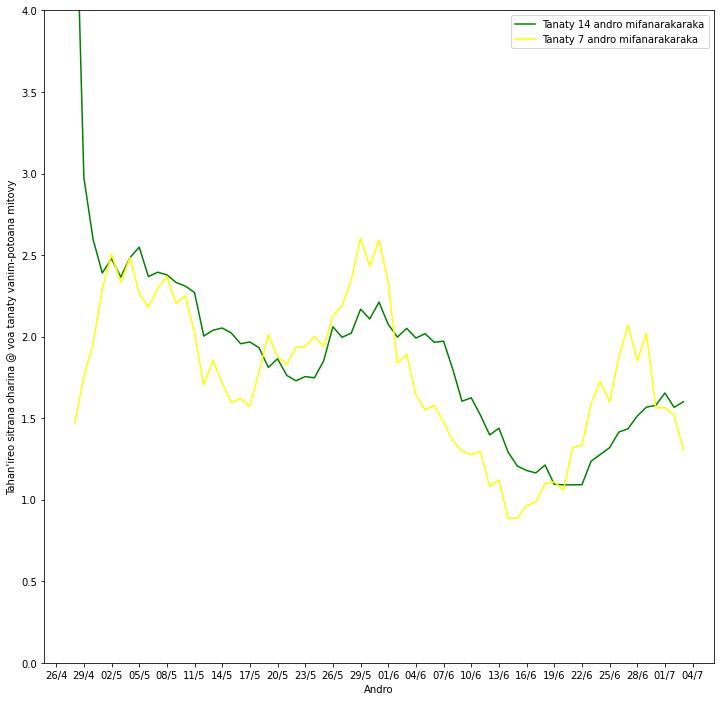

In [352]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsitrtan14'], color='green',label="Tanaty 14 andro mifanarakaraka")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsitrtan7'], color='yellow',label="Tanaty 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo sitrana oharina @ voa tanaty vanim-potoana mitovy")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,4)
#plt.savefig(path_to_save+'thsitrtan714.eps')
#plt.savefig(path_to_save+'thsitrtan714.png')

plt.show()

## Tahan'ny nodimandry tanaty 7 andro oharina amin'ny voa tanaty 7 andro

### fahar_aretin = 0

In [353]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 13:
    sitran = 0
    for k in range(i+1):
      sitran = sitran + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Nodimandry vao']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Noditan_14'] = sitran
  else:
    sitr = 0
    for j in range(14):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Nodimandry vao']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Noditan_14'] = sitr

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [354]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thnoditan7'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Noditan_7']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_7']
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thnoditan14'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Noditan_14']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatan_14']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


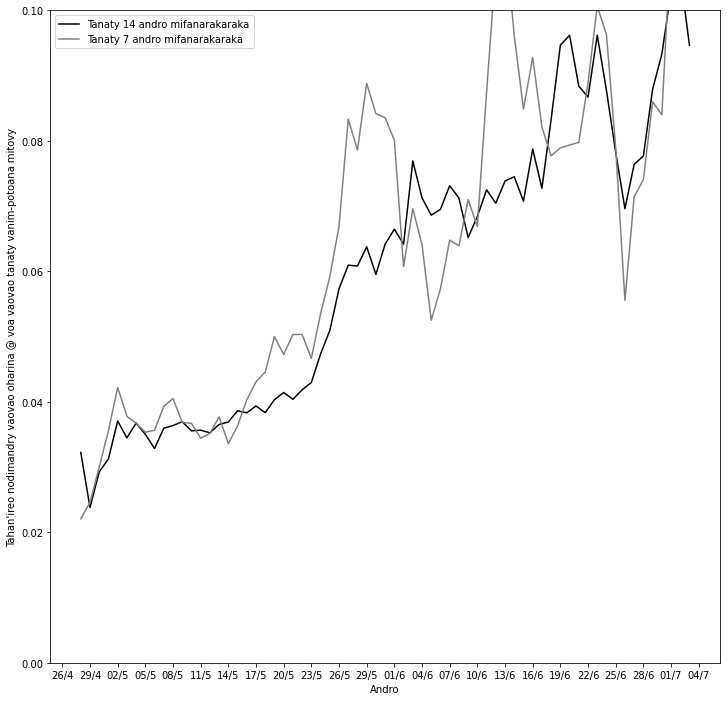

In [355]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thnoditan14'], color='black',label="Tanaty 14 andro mifanarakaraka")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thnoditan7'], color='grey',label="Tanaty 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo nodimandry vaovao oharina @ voa vaovao tanaty vanim-potoana mitovy")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.1)
#plt.savefig(path_to_save+'thnoditan714.eps')
#plt.savefig(path_to_save+'thnoditan714.png')

plt.show()

## Ireo mbola voa

In [356]:
for i in range((daty_data_mifar - daty_data_manom).days +1 + 6):
  tilyvoamdg.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Mbolvoa'] =  tilyvoamdg.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Voareh tomb'] - tilyvoamdg.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Sitranreh tvm'] - tilyvoamdg.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Nodimandry reh']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [357]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Mbolvoa']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


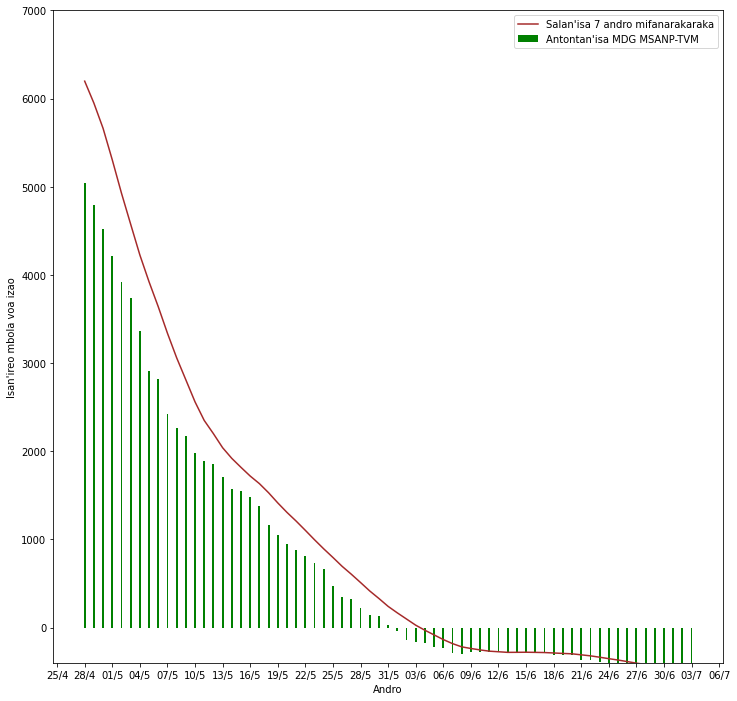

In [358]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoa'], width=0.2, color='green',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoa_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(-400,7000)
#plt.savefig(path_to_save+'mbolvoazao.eps')
#plt.savefig(path_to_save+'mbolvoazao.png')

plt.show()

In [359]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elanmbolvoa'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao tvm'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry vao']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [360]:
for i in range(1,(daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elmbolvoa'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Mbolvoa'] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [361]:
for i in range(1,(daty_data_mifar - daty_data_manom).days +1):
  a = tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elmbolvoa'] - tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elanmbolvoa']
  print(a)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-10.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-4.0
0.0
0.0
0.0
0.0
-71.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-5.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


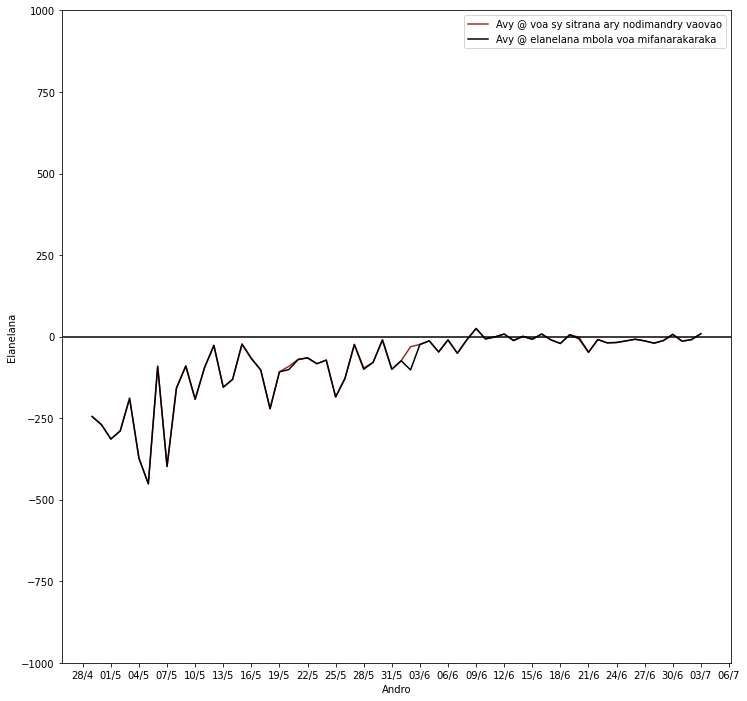

In [362]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom + datetime.timedelta(days = 1):daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom + datetime.timedelta(days = 1):daty_data_mifar,'Elanmbolvoa'], color='brown',label="Avy @ voa sy sitrana ary nodimandry vaovao")
ax.plot(tilyvoamdg.loc[daty_data_manom + datetime.timedelta(days = 1):daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom + datetime.timedelta(days = 1):daty_data_mifar,'Elmbolvoa'], color='black',label="Avy @ elanelana mbola voa mifanarakaraka")
ax.axhline(y=0, color='black', linestyle='solid')

ax.set(xlabel ='Andro', ylabel = "Elanelana")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(-1000,1000)
#plt.savefig(path_to_save+'elanelanmbolvoa.eps')
#plt.savefig(path_to_save+'elanelanmbolvoa.png')

plt.show()

## Tahan'ireo sitrana vaovao oharina @ ireo mbola voa izao

In [363]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'7_Thsitrvao'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao_7']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa_7']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


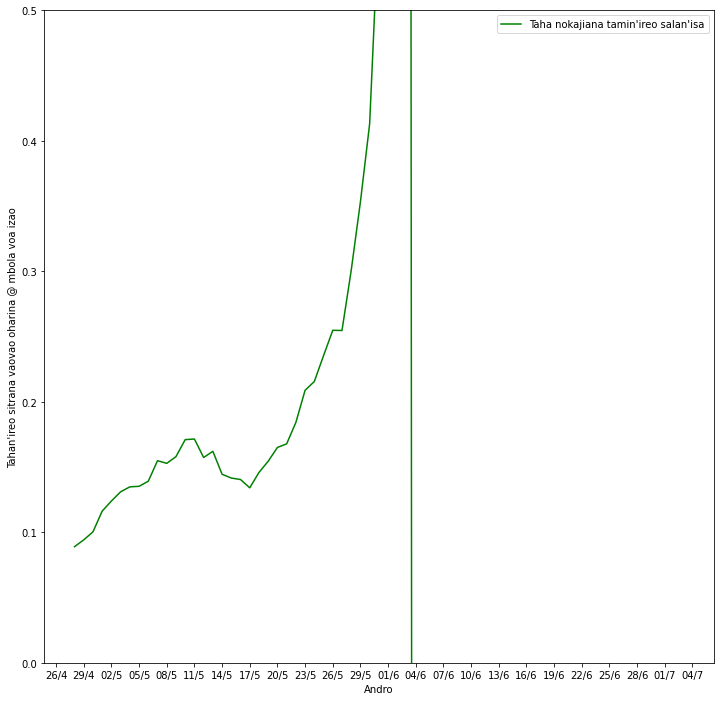

In [364]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'7_Thsitrvao'], color='green',label="Taha nokajiana tamin'ireo salan'isa")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo sitrana vaovao oharina @ mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.5)
#plt.savefig(path_to_save+'7thsitrzao.eps')
#plt.savefig(path_to_save+'7thsitrzao.png')

plt.show()

## Tahan'ireo nodimandry vaovao oharina @ ireo mbola voa izao

In [365]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'7_Thnodivao'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodivao_7']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa_7']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


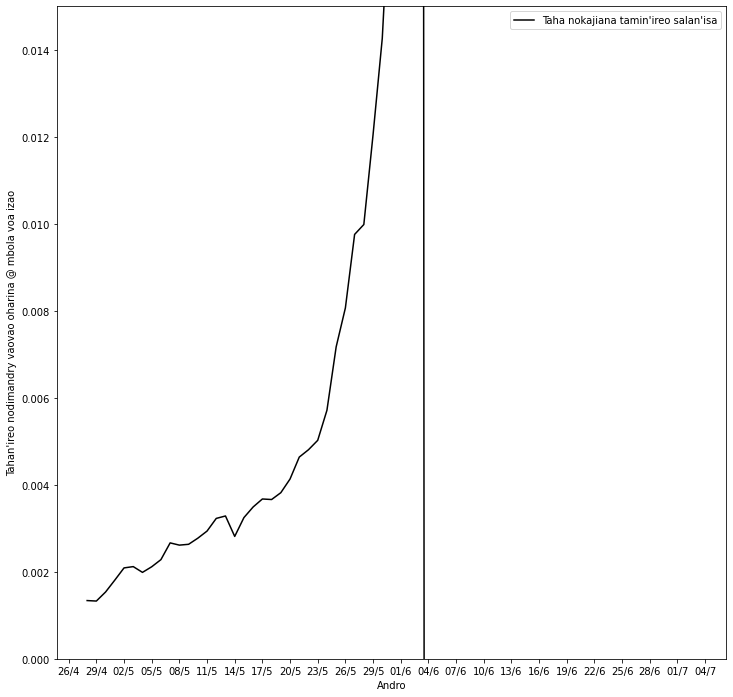

In [366]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'7_Thnodivao'], color='black',label="Taha nokajiana tamin'ireo salan'isa")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo nodimandry vaovao oharina @ mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.015)
#plt.savefig(path_to_save+'7thnodizao.eps')
#plt.savefig(path_to_save+'7thnodizao.png')

plt.show()

### Ireo fahasarotana

In [367]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'].isnull().sum()

0

In [368]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Fahasarotana']
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Fahasarotana_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


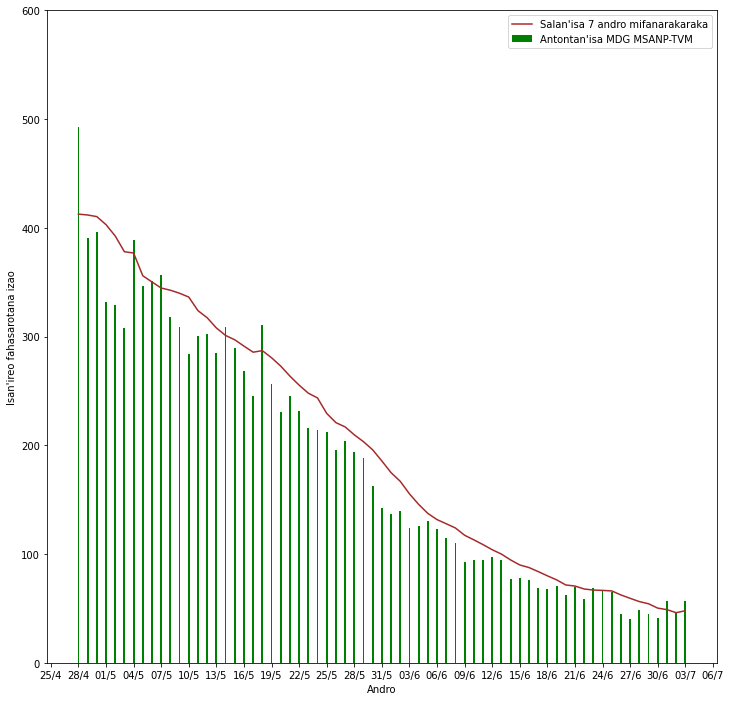

In [369]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width=0.2, color='green',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo fahasarotana izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,600)
#plt.savefig(path_to_save+'fahasarzao.eps')
#plt.savefig(path_to_save+'fahasarzao.png')

plt.show()

## Tahan'ireo manana fahasarotana oharina @ ireo mbola voa

#### Fomba mikajy salan'isan'ny taha

In [370]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Fahasarotana']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [371]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    mbl = 0
    for k in range(i+1):
      mbl = mbl + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Thsar']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar_7'] = mbl/(i+1)
  else:
    sitr = 0
    for j in range(7):
      sitr = sitr + tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Thsar']
    tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar_7'] = sitr/7

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


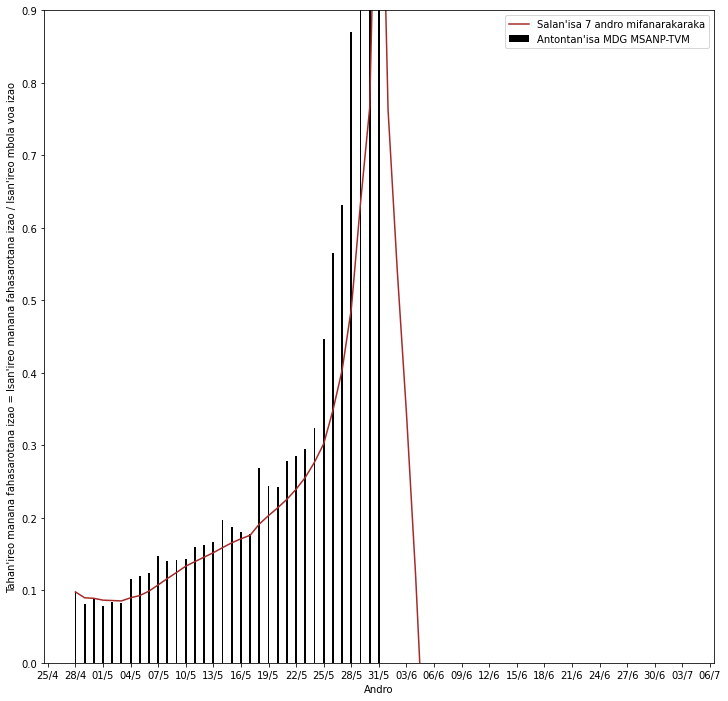

In [372]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsar'], width=0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsar_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo manana fahasarotana izao = Isan'ireo manana fahasarotana izao / Isan'ireo mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.9)
#plt.savefig(path_to_save+'thsarzao.eps')
#plt.savefig(path_to_save+'thsarzao.png')

plt.show()

#### Fomba mikajy ny tahan'ireo salan'isa

In [373]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'7_Thsar'] =  tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Fahasarotana_7']/tilyvoamdg.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbolvoa_7']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


#### Vokatra avy amin'ireo fomba fikajiana roa

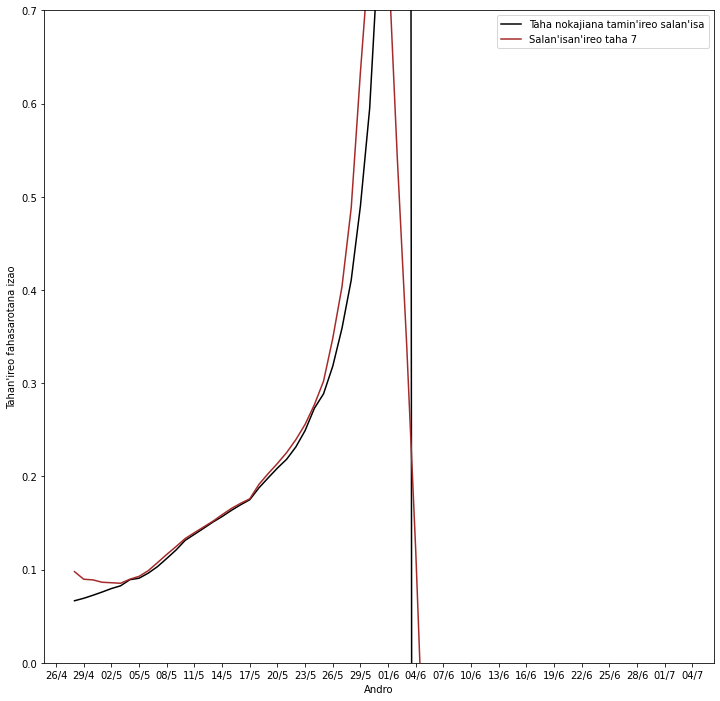

In [374]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'7_Thsar'], color='black',label="Taha nokajiana tamin'ireo salan'isa")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsar_7'], color='brown',label="Salan'isan'ireo taha 7")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo fahasarotana izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.7)
#plt.savefig(path_to_save+'7thsar7zao.eps')
#plt.savefig(path_to_save+'7thsar7zao.png')

plt.show()

## Hoan'i Kenya

### Ireo mbola voa

In [375]:
for i in range((daty_data_mifar - daty_data_manom).days + 1 + 6):
  tilyvoaken.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Voazao'] =  tilyvoaken.loc[format_date(daty_data_manom - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Marary hop'] + tilyvoaken.loc[format_date(daty_data_manom  - datetime.timedelta(days = 6) + datetime.timedelta(days = i)),'Marary tran'] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [376]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbvoa'] =  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voareh tomb'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranreh'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry reh']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [377]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Voazao']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voazao_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


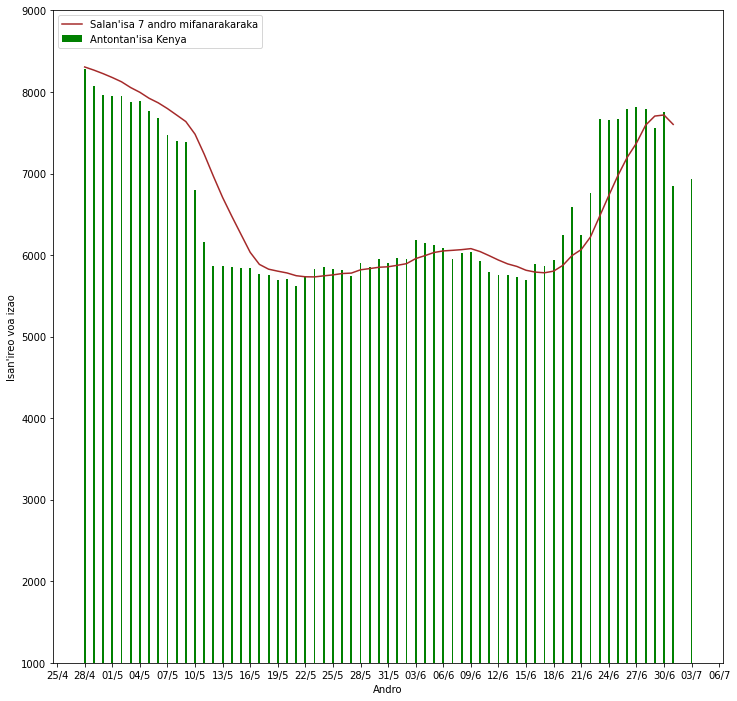

In [378]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voazao'], width=0.2, color='green',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voazao_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(1000,9000)
#plt.savefig(path_to_save+'voazaoken.eps')
#plt.savefig(path_to_save+'voazaoken.png')

plt.show()

### Fanamarinana

In [379]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elanmbolvoa'] =  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voatomb'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Sitranvao'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Nodimandry vao']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [380]:
for i in range(1,(daty_data_mifar - daty_data_manom).days + 1):
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elmbolvoa'] =  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Mbvoa'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i-1)),'Mbvoa'] 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [381]:
for i in range(1,(daty_data_mifar - daty_data_manom).days):
  b = tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elmbolvoa'] - tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Elanmbolvoa']
#  print(b)

### Tahan'ny sitrana hatrizay oharina amin'ireo voa hatrizay

### Ireo fahasarotana

In [382]:
tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'].isnull().sum()

0

In [383]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  voat = 0
  for j in range(7):
    voat = voat + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i) - datetime.timedelta(days = j)),'Fahasarotana']
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Fahasarotana_7'] = np.round(voat/7,1)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


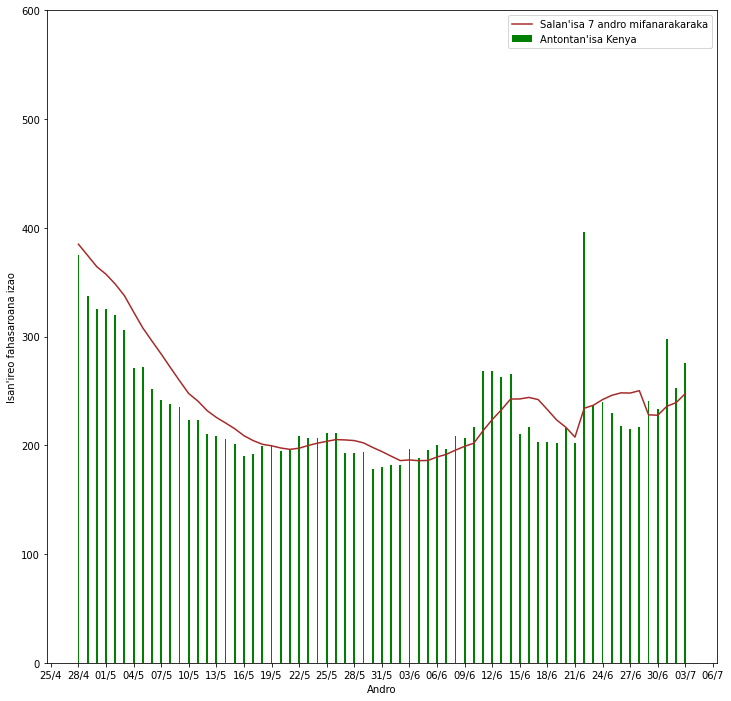

In [384]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width=0.2, color='green',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo fahasaroana izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,600)
#plt.savefig(path_to_save+'fahasarzaoken.eps')
#plt.savefig(path_to_save+'fahasarzaoken.png')

plt.show()

### Tahan'ireo fahasarotana

In [385]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar'] =  tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Fahasarotana']/tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Voazao']

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [386]:
for i in range((daty_data_mifar - daty_data_manom).days +1):
  if i < 6:
    mbl = 0
    for k in range(i+1):
      mbl = mbl + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - k)),'Thsar']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar_7'] = mbl/(i+1)
  else:
    sitr = 0
    for j in range(7):
      sitr = sitr + tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i - j)),'Thsar']
    tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = i)),'Thsar_7'] = sitr/7

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1763: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [387]:
tilyvoaken.loc[format_date(daty_data_manom + datetime.timedelta(days = 1)),'Thsar']

0.041749256689791875

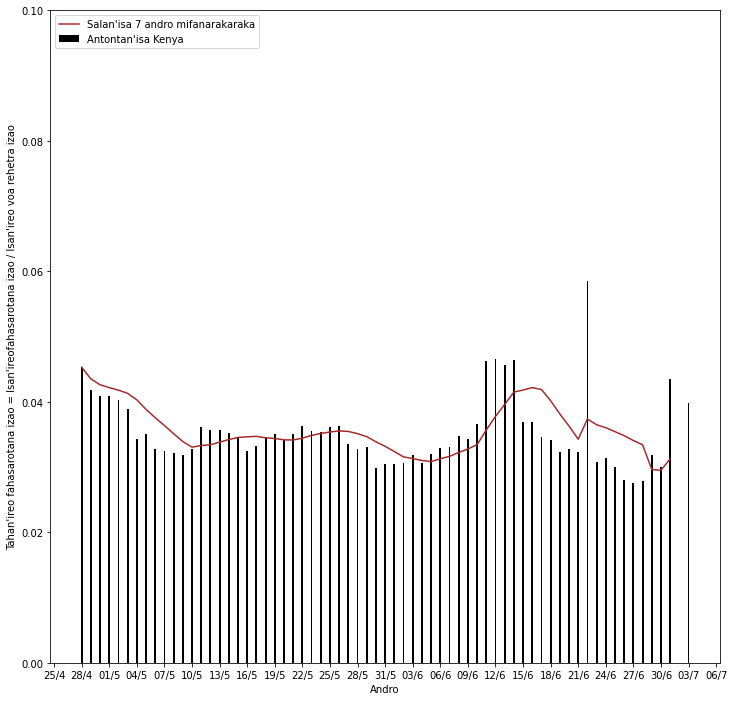

In [388]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Thsar'], width=0.2, color='black',label="Antontan'isa Kenya")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Thsar_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo fahasarotana izao = Isan'ireofahasarotana izao / Isan'ireo voa rehetra izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.1)
#plt.savefig(path_to_save+'thsarzaoken.eps')
#plt.savefig(path_to_save+'thsarzaoken.png')

plt.show()

### Fampitahana ireo tahan'ny fahasarotana

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


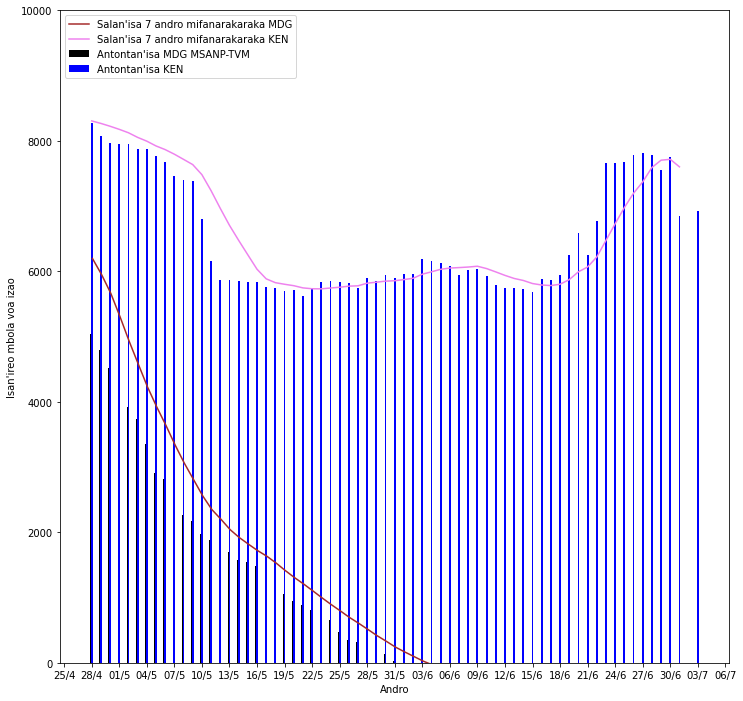

In [389]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index  - frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoa'], width = 0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index  + frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Mbolvoa_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voazao'], width = 0.2, color='blue',label="Antontan'isa KEN")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voazao_7'], color='violet',label="Salan'isa 7 andro mifanarakaraka KEN")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo mbola voa izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,10000)
plt.savefig(path_to_save+'mbolvoazaomdgken.eps')
plt.savefig(path_to_save+'mbolvoazaomdgken.png')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


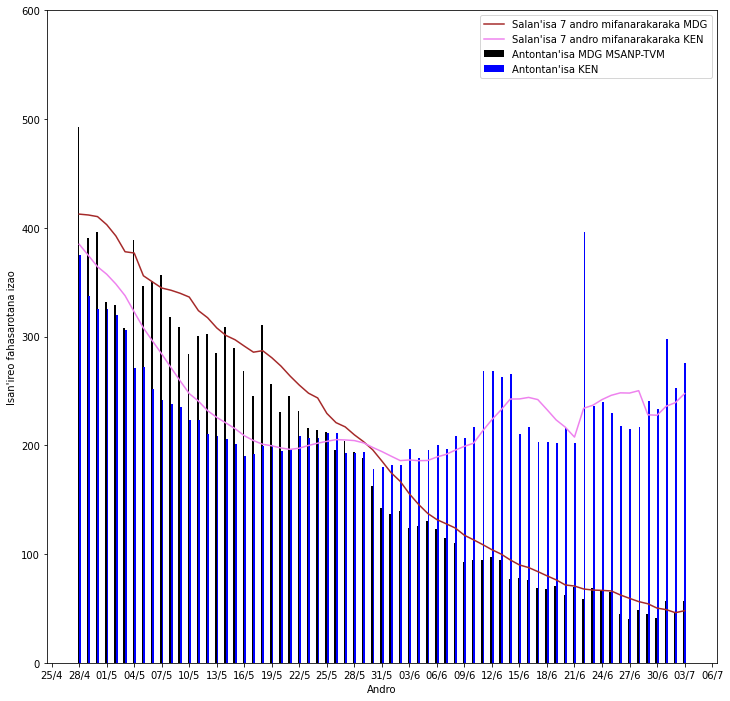

In [390]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index  - frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width = 0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index  + frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width = 0.2, color='blue',label="Antontan'isa KEN")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana_7'], color='violet',label="Salan'isa 7 andro mifanarakaraka KEN")

ax.set(xlabel ='Andro', ylabel = "Isan'ireo fahasarotana izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,600)
plt.savefig(path_to_save+'fahasarzaomdgken.eps')
plt.savefig(path_to_save+'fahasarzaomdgken.png')

plt.show()

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


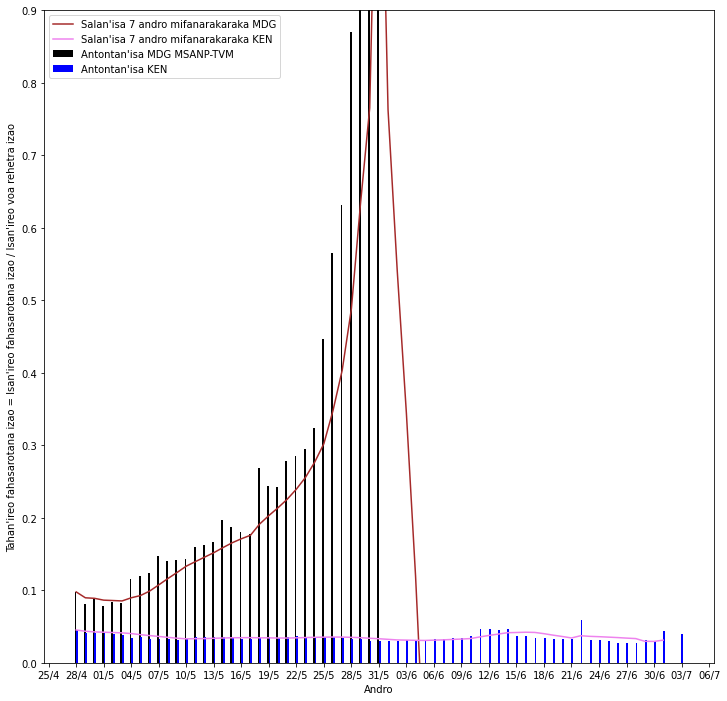

In [391]:
fig, ax = plt.subplots(figsize=(12, 12))

frtm = np.ones(len(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index))*datetime.timedelta(hours=2)

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index  - frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsar'], width = 0.2, color='black',label="Antontan'isa MDG MSANP-TVM")
ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Thsar_7'], color='brown',label="Salan'isa 7 andro mifanarakaraka MDG")

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index  + frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Thsar'], width = 0.2, color='blue',label="Antontan'isa KEN")
ax.plot(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Thsar_7'], color='violet',label="Salan'isa 7 andro mifanarakaraka KEN")

ax.set(xlabel ='Andro', ylabel = "Tahan'ireo fahasarotana izao = Isan'ireo fahasarotana izao / Isan'ireo voa rehetra izao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,0.9)
#plt.savefig(path_to_save+'thsarzaomdgken.eps')
#plt.savefig(path_to_save+'thsarzaomdgken.png')

plt.show()

### Momba ireo isa hatrizay

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


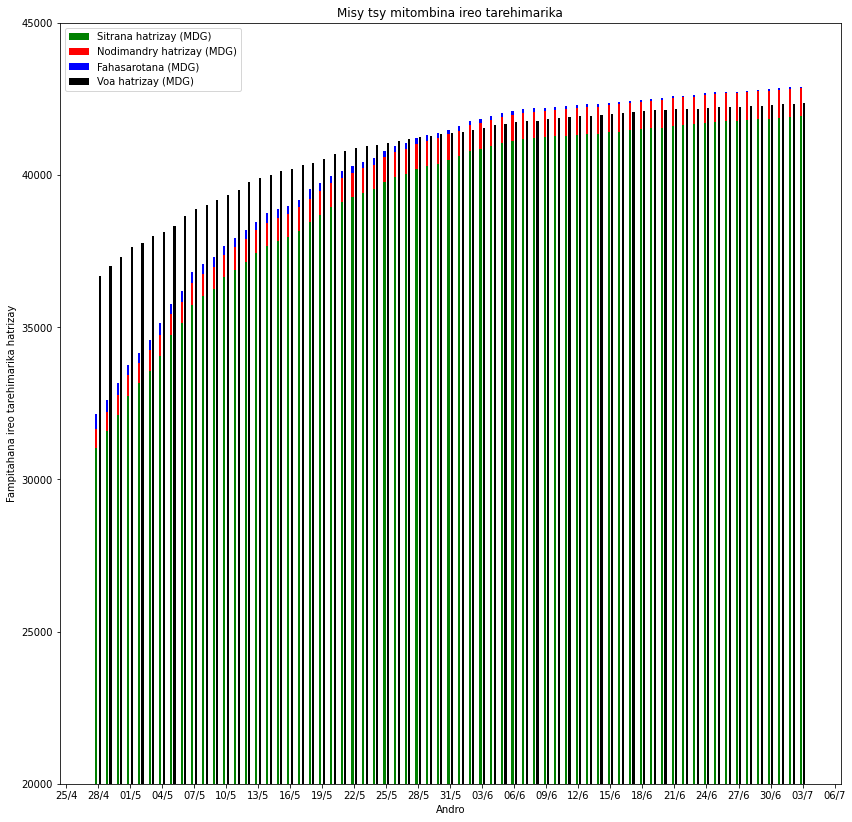

In [392]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranreh tvm'], width= 0.2, color = 'green',label = 'Sitrana hatrizay (MDG)')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranreh tvm'], color = 'red', label = 'Nodimandry hatrizay (MDG)')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranreh tvm'] + tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], color = 'blue', label = 'Fahasarotana (MDG)')

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voareh tomb'], width= 0.2, color = 'black',label = 'Voa hatrizay (MDG)')



ax.set(xlabel ='Andro', ylabel = "Fampitahana ireo tarehimarika hatrizay", title = 'Misy tsy mitombina ireo tarehimarika')

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(20000,45000)
plt.savefig(path_to_save+'fampitahreh.eps')
plt.savefig(path_to_save+'fampitahreh.png')

plt.show()

### Kenya

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


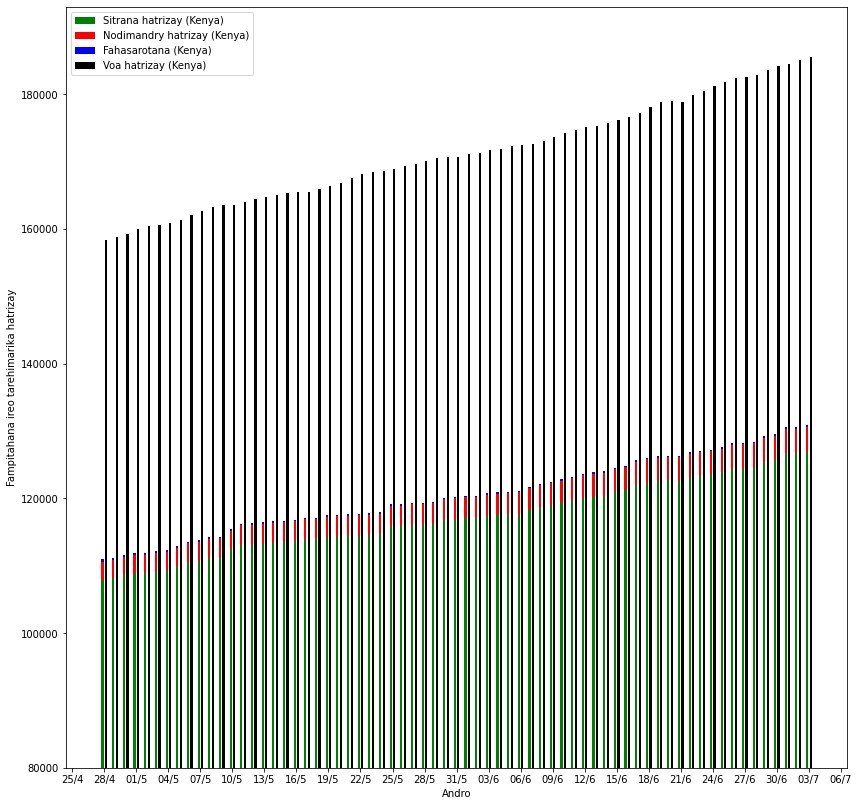

In [393]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranreh'], width= 0.2, color = 'green',label = 'Sitrana hatrizay (Kenya)')
ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], width= 0.2, bottom = tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranreh'], color = 'red', label = 'Nodimandry hatrizay (Kenya)')
ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width= 0.2, bottom = tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Sitranreh'] + tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], color = 'blue', label = 'Fahasarotana (Kenya)')

ax.bar(tilyvoaken.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoaken.loc[daty_data_manom:daty_data_mifar,'Voareh tomb'], width= 0.2, color = 'black',label = 'Voa hatrizay (Kenya)')



ax.set(xlabel ='Andro', ylabel = "Fampitahana ireo tarehimarika hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(80000,193000)
plt.savefig(path_to_save+'fampitahrehken.eps')
plt.savefig(path_to_save+'fampitahrehken.png')

plt.show()

### Afrika Atsimo

/usr/local/lib/python3.7/dist-packages/pandas/core/arrays/datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


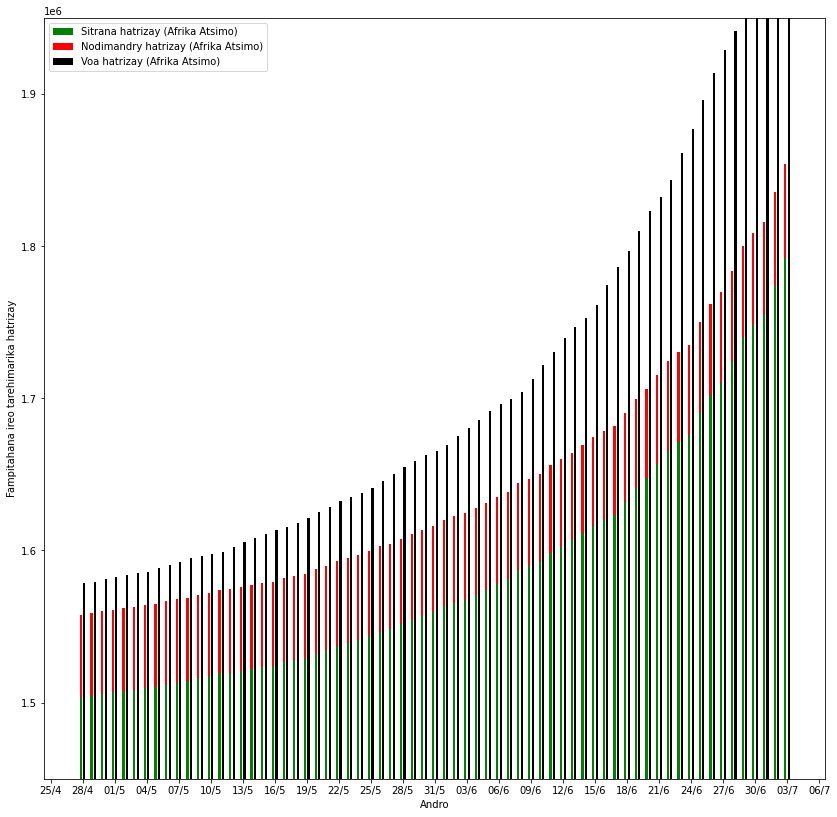

In [394]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranreh'], width= 0.2, color = 'green',label = 'Sitrana hatrizay (Afrika Atsimo)')
ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], width= 0.2, bottom = tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranreh'], color = 'red', label = 'Nodimandry hatrizay (Afrika Atsimo)')
#ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index - 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Fahasarotana'], width= 0.2, bottom = tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Sitranreh'] + tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Nodimandry reh'], color = 'blue', label = 'Fahasarotana (Kenya)')

ax.bar(tilyvoasaf.loc[daty_data_manom:daty_data_mifar].index + 2*frtm, tilyvoasaf.loc[daty_data_manom:daty_data_mifar,'Voareh'], width= 0.2, color = 'black',label = 'Voa hatrizay (Afrika Atsimo)')



ax.set(xlabel ='Andro', ylabel = "Fampitahana ireo tarehimarika hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(1450000,1950000)
plt.savefig(path_to_save+'fampitahrehsaf.eps')
plt.savefig(path_to_save+'fampitahrehsaf.png')

plt.show()

## Tahan'ireo voatily tsy voa

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


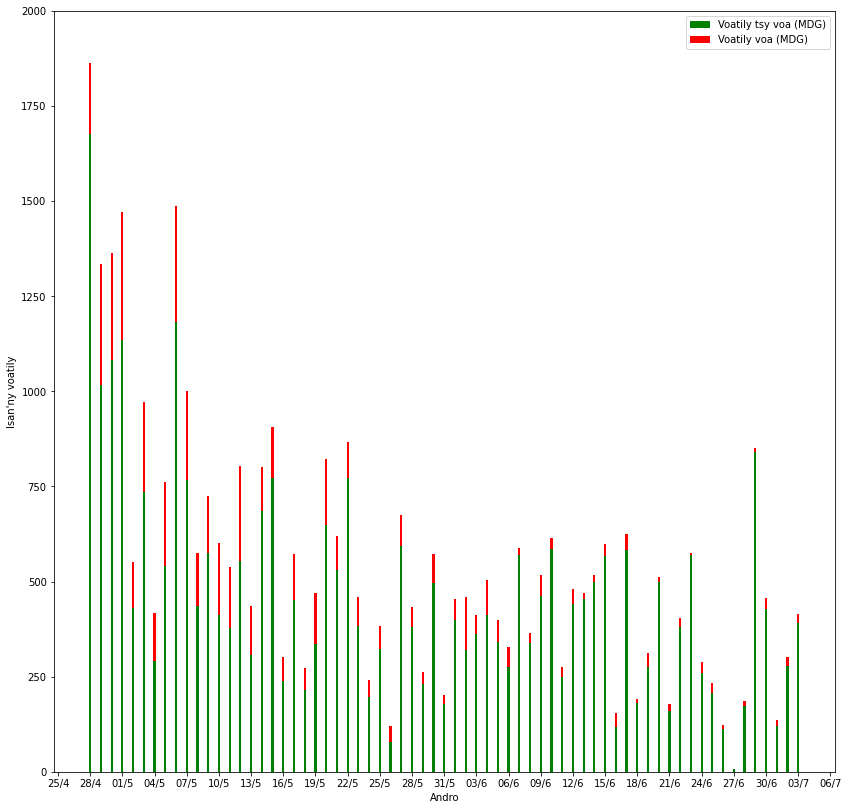

In [395]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Tsyvoatomb'], width= 0.2, color = 'green',label = 'Voatily tsy voa (MDG)')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Tsyvoatomb'], color = 'red', label = 'Voatily voa (MDG)')

ax.set(xlabel ='Andro', ylabel = "Isan'ny voatily")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,2000)
plt.savefig(path_to_save+'mdgtahatv.eps')
plt.savefig(path_to_save+'mdgtahatv.png')

plt.show()

In [396]:
#tilyvoamdg.loc[datetime.date(2020,6,30), 'Tahatsv']

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


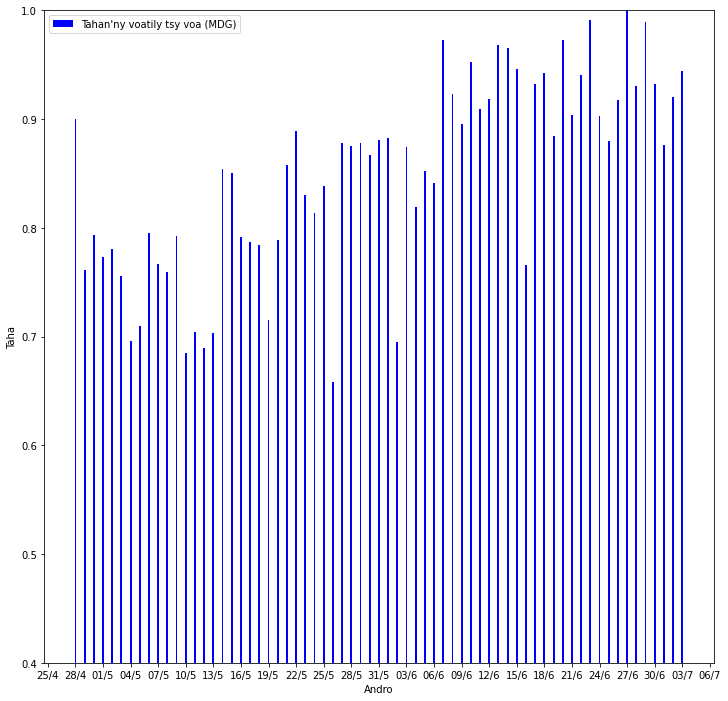

In [397]:


fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Tahatsv'],  width= 0.2, color= 'blue', label = "Tahan'ny voatily tsy voa (MDG)")

              
ax.set(xlabel ='Andro', ylabel = "Taha")

plt.ylim(0.4,1)

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgtahatsv.eps')
plt.savefig(path_to_save+'mdgtahatsv.png')
plt.show()

In [398]:
tilyvoamdg.loc[:,'Mombatahatsv'] = np.where(tilyvoamdg['Tahatsv']>=0.8, 'tahabe', 'tahakely')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [399]:
tilyvoamdg['Mombatily'] = np.where(tilyvoamdg['Tilyvoatomb']>=600, 'tilybe', 'tilykely')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [400]:
tilyvoamdg.loc[:,'Mombatahatsv']

Daty
2020-03-18    tahabe
2020-03-19    tahabe
2020-03-20    tahabe
2020-03-21    tahabe
2020-03-22    tahabe
               ...  
2021-06-29    tahabe
2021-06-30    tahabe
2021-07-01    tahabe
2021-07-02    tahabe
2021-07-03    tahabe
Name: Mombatahatsv, Length: 284, dtype: object

In [401]:
tilyvoadat_man_mif = tilyvoamdg.loc[daty_data_manom:daty_data_mifar]

In [402]:
type(tilyvoadat_man_mif)

pandas.core.frame.DataFrame

In [403]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index.is_unique

True

In [404]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [405]:
tilyvoadat_man_mif.loc[tilyvoadat_man_mif['Mombatahatsv'] == 'tahabe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Fahasarotana,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Sitranreh w,Mbolavoa w,Unnamed: 28,MRC Rt.1,Unnamed: 30,Voatomb_7,Voatan_7,thvoatomb_7,Sitranvao_7,Sitrtan_7,Nodivao_7,Noditan_7,Mombatahasitr,Tahanodi,Sitr_tan,Thsitrtan7,Nodi_tan,Sitrtan_14,Voatan_14,Thsitrtan14,Noditan_14,Thnoditan7,Thnoditan14,Mbolvoa,Mbolvoa_7,Elanmbolvoa,Elmbolvoa,7_Thsitrvao,7_Thnodivao,Fahasarotana_7,Thsar,Thsar_7,7_Thsar,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-28,NaN,Madagasikara,NaN,NaN,NaN,181638.0,1862.0,1862.0,NaN,186.0,186.0,NaN,1676.0,NaN,NaN,36696.0,36696.0,NaN,943.0,31019.0,493.0,6.0,637.0,0.9001,0.8453,29950.0,6109.0,NaN,NaN,NaN,375.3,2627.0,0.000058,551.6,3861.0,8.3,58.0,tahakely,0.017359,943.0,1.469737,6.0,943.0,186.0,5.069892,6.0,0.022078,0.032258,5040.0,6198.1,-763.0,NaN,0.088995,0.001339,412.7,0.097817,0.097817,0.066585,tahabe,tilybe
2021-05-14,NaN,Madagasikara,NaN,NaN,NaN,195471.0,802.0,802.0,NaN,117.0,117.0,NaN,685.0,NaN,NaN,40005.0,40005.0,NaN,242.0,37679.0,309.0,6.0,754.0,0.8541,0.9419,36610.0,2641.0,NaN,NaN,NaN,161.6,1131.0,0.000041,277.3,1941.0,5.4,38.0,tahabe,0.018848,792.0,1.716180,16.0,5562.0,2709.0,2.053156,100.0,0.033599,0.036914,1572.0,1918.9,-131.0,-131.0,0.144510,0.002814,301.1,0.196565,0.158917,0.156913,tahabe,tilybe
2021-05-15,NaN,Madagasikara,NaN,NaN,NaN,196378.0,907.0,907.0,NaN,136.0,136.0,NaN,771.0,NaN,NaN,40141.0,40141.0,NaN,150.0,37829.0,290.0,9.0,763.0,0.8501,0.9424,36760.0,2618.0,NaN,NaN,NaN,161.3,1129.0,0.000041,257.3,1801.0,5.9,41.0,tahabe,0.019008,673.0,1.595217,18.0,5076.0,2511.0,2.021505,97.0,0.036315,0.038630,1549.0,1817.0,-23.0,-23.0,0.141607,0.003247,297.1,0.187218,0.165579,0.163511,tahabe,tilybe
2021-05-21,NaN,Madagasikara,NaN,NaN,NaN,199438.0,619.0,619.0,NaN,88.0,88.0,NaN,531.0,NaN,NaN,40780.0,40780.0,NaN,151.0,39107.0,245.0,7.0,793.0,0.8578,0.9590,38028.0,1959.0,NaN,NaN,NaN,110.7,775.0,0.000028,202.6,1418.0,5.6,39.0,tahabe,0.019446,648.0,1.829677,16.0,3359.0,1906.0,1.762329,77.0,0.050323,0.040399,880.0,1207.3,-70.0,-70.0,0.167812,0.004638,263.7,0.278409,0.225581,0.218421,tahabe,tilybe
2021-05-22,NaN,Madagasikara,NaN,NaN,NaN,200306.0,868.0,868.0,NaN,96.0,96.0,NaN,772.0,NaN,NaN,40876.0,40876.0,NaN,154.0,39261.0,232.0,7.0,800.0,0.8894,0.9605,38182.0,1894.0,NaN,NaN,NaN,105.0,735.0,0.000027,203.1,1422.0,5.3,37.0,tahabe,0.019571,566.0,1.934694,17.0,3223.0,1864.0,1.729077,78.0,0.050340,0.041845,815.0,1102.4,-65.0,-65.0,0.184234,0.004808,255.4,0.284663,0.239502,0.231676,tahabe,tilybe
2021-05-23,NaN,Madagasikara,NaN,NaN,NaN,200766.0,460.0,460.0,NaN,78.0,78.0,NaN,382.0,NaN,NaN,40954.0,40954.0,NaN,155.0,39416.0,216.0,6.0,806.0,0.8304,0.9624,38337.0,1811.0,NaN,NaN,NaN,107.1,750.0,0.000027,207.9,1455.0,5.0,35.0,tahabe,0.019681,460.0,1.940000,20.0,3145.0,1792.0,1.755022,77.0,0.046667,0.042969,732.0,995.3,-83.0,-83.0,0.208882,0.005024,248.0,0.295082,0.255823,0.249171,tahabe,tilykely
2021-05-24,NaN,Madagasikara,NaN,NaN,NaN,201007.0,241.0,241.0,NaN,45.0,45.0,NaN,196.0,NaN,NaN,40999.0,40999.0,NaN,113.0,39529.0,214.0,4.0,810.0,0.8133,0.9641,38450.0,1739.0,NaN,NaN,NaN,96.1,673.0,0.000024,192.4,1347.0,5.1,36.0,tahabe,0.019757,422.0,2.001486,17.0,2880.0,1648.0,1.747573,78.0,0.053492,0.047330,660.0,892.4,-72.0,-72.0,0.215598,0.005715,243.6,0.324242,0.276781,0.272972,tahabe,tilykely
2021-05-25,NaN,Madagasikara,NaN,NaN,NaN,201391.0,384.0,384.0,NaN,62.0,62.0,NaN,322.0,NaN,NaN,41061.0,41061.0,NaN,240.0,39769.0,212.0,7.0,817.0,0.8385,0.9685,38690.0,1554.0,NaN,NaN,NaN,96.6,676.0,0.000024,187.1,1310.0,5.7,40.0,tahabe,0.019897,508.0,1.937870,17.0,2872.0,1551.0,1.851709,79.0,0.059172,0.050935,475.0,794.7,-185.0,-185.0,0.235435,0.007173,229.4,0.446316,0.302207,0.288662,tahabe,tilykely
2021-05-27,NaN,Madagasikara,NaN,NaN,NaN,202186.0,675.0,675.0,NaN,82.0,82.0,NaN,5

In [406]:
tilyvoadat_man_mif.loc[tilyvoadat_man_mif['Mombatahatsv'] == 'tahakely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Fahasarotana,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Sitranreh w,Mbolavoa w,Unnamed: 28,MRC Rt.1,Unnamed: 30,Voatomb_7,Voatan_7,thvoatomb_7,Sitranvao_7,Sitrtan_7,Nodivao_7,Noditan_7,Mombatahasitr,Tahanodi,Sitr_tan,Thsitrtan7,Nodi_tan,Sitrtan_14,Voatan_14,Thsitrtan14,Noditan_14,Thnoditan7,Thnoditan14,Mbolvoa,Mbolvoa_7,Elanmbolvoa,Elmbolvoa,7_Thsitrvao,7_Thnodivao,Fahasarotana_7,Thsar,Thsar_7,7_Thsar,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-29,NaN,Madagasikara,NaN,NaN,NaN,182972.0,1334.0,1334.0,NaN,318.0,318.0,NaN,1016.0,NaN,NaN,37014.0,37014.0,NaN,557.0,31576.0,391.0,6.0,643.0,0.7616,0.8531,30507.0,5864.0,NaN,NaN,NaN,319.9,2239.0,0.000058,560.6,3924.0,7.9,55.0,tahakely,0.017372,1500.0,1.752568,12.0,1500.0,504.0,2.976190,12.0,0.024565,0.023810,4795.0,5949.6,-245.0,-245.0,0.094225,0.001328,411.9,0.081543,0.089680,0.069232,tahakely,tilybe
2021-04-30,NaN,Madagasikara,NaN,NaN,NaN,184336.0,1364.0,1364.0,NaN,282.0,282.0,NaN,1082.0,NaN,NaN,37296.0,37296.0,NaN,541.0,32117.0,396.0,11.0,654.0,0.7933,0.8611,31048.0,5594.0,NaN,NaN,NaN,290.6,2034.0,0.000058,568.4,3979.0,8.7,61.0,tahakely,0.017535,2041.0,1.956244,23.0,2041.0,786.0,2.596692,23.0,0.029990,0.029262,4525.0,5663.0,-270.0,-270.0,0.100371,0.001536,410.4,0.087514,0.088958,0.072470,tahakely,tilybe
2021-05-01,NaN,Madagasikara,NaN,NaN,NaN,185806.0,1470.0,1470.0,NaN,334.0,334.0,NaN,1136.0,NaN,NaN,37630.0,37630.0,NaN,636.0,32753.0,332.0,12.0,666.0,0.7728,0.8704,31684.0,5280.0,NaN,NaN,NaN,269.1,1884.0,0.000058,616.9,4318.0,9.6,67.0,tahakely,0.017699,1734.0,2.291932,29.0,2677.0,1120.0,2.390179,35.0,0.035563,0.031250,4211.0,5305.7,-314.0,-314.0,0.116271,0.001809,403.0,0.078841,0.086429,0.075956,tahakely,tilybe
2021-05-02,NaN,Madagasikara,NaN,NaN,NaN,186358.0,552.0,552.0,NaN,121.0,121.0,NaN,431.0,NaN,NaN,37751.0,37751.0,NaN,399.0,33152.0,329.0,11.0,677.0,0.7808,0.8782,32083.0,4991.0,NaN,NaN,NaN,243.7,1706.0,0.000058,611.1,4278.0,10.3,72.0,tahakely,0.017933,1576.0,2.507620,34.0,3076.0,1241.0,2.478646,46.0,0.042204,0.037067,3922.0,4928.0,-289.0,-289.0,0.124006,0.002090,392.6,0.083886,0.085920,0.079667,tahakely,tilykely
2021-05-03,NaN,Madagasikara,NaN,NaN,NaN,187331.0,973.0,973.0,NaN,238.0,238.0,NaN,735.0,NaN,NaN,37989.0,37989.0,NaN,422.0,33574.0,308.0,5.0,682.0,0.7554,0.8838,32505.0,4802.0,NaN,NaN,NaN,257.0,1799.0,0.000058,599.7,4198.0,9.7,68.0,tahakely,0.017953,1457.0,2.333519,28.0,3498.0,1479.0,2.365112,51.0,0.037799,0.034483,3733.0,4575.6,-189.0,-189.0,0.131065,0.002120,378.1,0.082507,0.085351,0.082634,tahakely,tilybe
2021-05-04,NaN,Madagasikara,NaN,NaN,NaN,187749.0,418.0,418.0,NaN,127.0,127.0,NaN,291.0,NaN,NaN,38116.0,38116.0,NaN,492.0,34066.0,389.0,8.0,690.0,0.6962,0.8937,32997.0,4429.0,NaN,NaN,NaN,229.4,1606.0,0.000058,570.0,3990.0,8.4,59.0,tahakely,0.018103,1313.0,2.484433,24.0,3990.0,1606.0,2.484433,59.0,0.036737,0.036737,3360.0,4226.6,-373.0,-373.0,0.134860,0.001987,376.9,0.115774,0.089698,0.089173,tahakely,tilykely
2021-05-05,NaN,Madagasikara,NaN,NaN,NaN,188510.0,761.0,761.0,NaN,221.0,221.0,NaN,540.0,NaN,NaN,38337.0,38337.0,NaN,667.0,34733.0,347.0,5.0,695.0,0.7096,0.9060,33664.0,3978.0,NaN,NaN,NaN,234.4,1641.0,0.000059,530.6,3714.0,8.3,58.0,tahabe,0.018129,1581.0,2.263254,18.0,4657.0,1827.0,2.548987,64.0,0.035344,0.035030,2909.0,3922.1,-451.0,-451.0,0.135285,0.002116,356.0,0.119285,0.092764,0.090768,tahakely,tilybe
2021-05-06,NaN,Madagasikara,NaN,NaN,NaN,189996.0,1486.0,1486.0,NaN,304.0,304.0,NaN,1182.0,NaN,NaN,38641.0,38641.0,NaN,389.0,35122.0,351.0,6.0,701.0,0.7954,0.9089,34053.0,3887.0,NaN,NaN,NaN,232.4,1627.0,0.000059,506.6,3546.0,8.3,58.0,tahabe,0.018141,1548.0,2.179471,19.0,5046.0,2131.0,2.367902,70.0,0.035648,0.032848,2818.0,3639.7,-91.0,-91.0,0.139187,0.002280,350.3,0.124556,0.098909,0.096244,tahakely,tilyb

In [407]:
tilyvoadat_man_mif.loc[tilyvoadat_man_mif['Mombatily'] == 'tilykely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Fahasarotana,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Sitranreh w,Mbolavoa w,Unnamed: 28,MRC Rt.1,Unnamed: 30,Voatomb_7,Voatan_7,thvoatomb_7,Sitranvao_7,Sitrtan_7,Nodivao_7,Noditan_7,Mombatahasitr,Tahanodi,Sitr_tan,Thsitrtan7,Nodi_tan,Sitrtan_14,Voatan_14,Thsitrtan14,Noditan_14,Thnoditan7,Thnoditan14,Mbolvoa,Mbolvoa_7,Elanmbolvoa,Elmbolvoa,7_Thsitrvao,7_Thnodivao,Fahasarotana_7,Thsar,Thsar_7,7_Thsar,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-05-02,NaN,Madagasikara,NaN,NaN,NaN,186358.0,552.0,552.0,NaN,121.0,121.0,NaN,431.0,NaN,NaN,37751.0,37751.0,NaN,399.0,33152.0,329.0,11.0,677.0,0.7808,0.8782,32083.0,4991.0,NaN,NaN,NaN,243.7,1706.0,0.000058,611.1,4278.0,10.3,72.0,tahakely,0.017933,1576.0,2.507620,34.0,3076.0,1241.0,2.478646,46.0,0.042204,0.037067,3922.0,4928.0,-289.0,-289.0,0.124006,0.002090,392.6,0.083886,0.085920,0.079667,tahakely,tilykely
2021-05-04,NaN,Madagasikara,NaN,NaN,NaN,187749.0,418.0,418.0,NaN,127.0,127.0,NaN,291.0,NaN,NaN,38116.0,38116.0,NaN,492.0,34066.0,389.0,8.0,690.0,0.6962,0.8937,32997.0,4429.0,NaN,NaN,NaN,229.4,1606.0,0.000058,570.0,3990.0,8.4,59.0,tahakely,0.018103,1313.0,2.484433,24.0,3990.0,1606.0,2.484433,59.0,0.036737,0.036737,3360.0,4226.6,-373.0,-373.0,0.134860,0.001987,376.9,0.115774,0.089698,0.089173,tahakely,tilykely
2021-05-08,NaN,Madagasikara,NaN,NaN,NaN,191570.0,574.0,574.0,NaN,138.0,138.0,NaN,436.0,NaN,NaN,39012.0,39012.0,NaN,290.0,36028.0,318.0,6.0,722.0,0.7596,0.9235,34959.0,3331.0,NaN,NaN,NaN,197.4,1382.0,0.000050,467.9,3275.0,8.0,56.0,tahabe,0.018507,1295.0,2.369754,27.0,5952.0,2502.0,2.378897,91.0,0.040521,0.036371,2262.0,3060.6,-158.0,-158.0,0.152879,0.002614,342.7,0.140584,0.116302,0.111972,tahakely,tilykely
2021-05-11,NaN,Madagasikara,NaN,NaN,NaN,193431.0,537.0,537.0,NaN,159.0,159.0,NaN,378.0,NaN,NaN,39510.0,39510.0,NaN,248.0,36887.0,301.0,6.0,738.0,0.7039,0.9336,35818.0,2954.0,NaN,NaN,NaN,199.1,1394.0,0.000050,403.0,2821.0,6.9,48.0,tahabe,0.018679,859.0,2.023673,16.0,6811.0,3000.0,2.270333,107.0,0.034433,0.035667,1885.0,2349.4,-95.0,-95.0,0.171533,0.002937,323.9,0.159682,0.139618,0.137865,tahakely,tilykely
2021-05-13,NaN,Madagasikara,NaN,NaN,NaN,194669.0,435.0,435.0,NaN,129.0,129.0,NaN,306.0,NaN,NaN,39888.0,39888.0,NaN,281.0,37437.0,285.0,3.0,748.0,0.7034,0.9386,36368.0,2772.0,NaN,NaN,NaN,178.1,1247.0,0.000045,330.7,2315.0,6.7,47.0,tahabe,0.018753,798.0,1.856455,16.0,5861.0,2874.0,2.039318,105.0,0.037690,0.036534,1703.0,2040.0,-155.0,-155.0,0.162108,0.003284,308.0,0.167352,0.151911,0.150980,tahakely,tilykely
2021-05-16,NaN,Madagasikara,NaN,NaN,NaN,196680.0,302.0,302.0,NaN,63.0,63.0,NaN,239.0,NaN,NaN,40204.0,40204.0,NaN,122.0,37951.0,268.0,8.0,771.0,0.7914,0.9440,36882.0,2551.0,NaN,NaN,NaN,148.9,1042.0,0.000038,241.4,1690.0,6.0,42.0,tahabe,0.019177,514.0,1.621881,23.0,4799.0,2453.0,1.956380,94.0,0.040307,0.038320,1482.0,1718.4,-67.0,-67.0,0.140480,0.003492,291.3,0.180837,0.171090,0.169518,tahakely,tilykely
2021-05-17,NaN,Madagasikara,NaN,NaN,NaN,197253.0,573.0,573.0,NaN,122.0,122.0,NaN,451.0,NaN,NaN,40326.0,40326.0,NaN,221.0,38172.0,245.0,3.0,774.0,0.7871,0.9466,37103.0,2449.0,NaN,NaN,NaN,139.3,975.0,0.000035,219.0,1533.0,6.0,42.0,tahabe,0.019194,493.0,1.572308,20.0,4598.0,2337.0,1.967480,92.0,0.043077,0.039367,1380.0,1632.7,-102.0,-102.0,0.134134,0.003675,285.7,0.177536,0.175961,0.174986,tahakely,tilykely
2021-05-18,NaN,Madagasikara,NaN,NaN,NaN,197527.0,274.0,274.0,NaN,59.0,59.0,NaN,215.0,NaN,NaN,40385.0,40385.0,NaN,277.0,38449.0,311.0,3.0,777.0,0.7847,0.9521,37380.0,2228.0,NaN,NaN,NaN,125.0,875.0,0.000032,223.1,1562.0,5.6,39.0,tahabe,0.019240,620.0,1.785143,14.0,4383.0,2269.0,1.931688,87.0,0.044571,0.038343,1159.0,1529.0,-221.0,-221.0,0.145912,0.003663,287.1,0.268335,0.191483,0.187770,tahakely,tilykely
2021-05-19,NaN,Ma

In [408]:
tilyvoadat_man_mif.loc[tilyvoadat_man_mif['Mombatily'] == 'tilybe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Fahasarotana,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,Sitranreh w,Mbolavoa w,Unnamed: 28,MRC Rt.1,Unnamed: 30,Voatomb_7,Voatan_7,thvoatomb_7,Sitranvao_7,Sitrtan_7,Nodivao_7,Noditan_7,Mombatahasitr,Tahanodi,Sitr_tan,Thsitrtan7,Nodi_tan,Sitrtan_14,Voatan_14,Thsitrtan14,Noditan_14,Thnoditan7,Thnoditan14,Mbolvoa,Mbolvoa_7,Elanmbolvoa,Elmbolvoa,7_Thsitrvao,7_Thnodivao,Fahasarotana_7,Thsar,Thsar_7,7_Thsar,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-04-28,NaN,Madagasikara,NaN,NaN,NaN,181638.0,1862.0,1862.0,NaN,186.0,186.0,NaN,1676.0,NaN,NaN,36696.0,36696.0,NaN,943.0,31019.0,493.0,6.0,637.0,0.9001,0.8453,29950.0,6109.0,NaN,NaN,NaN,375.3,2627.0,0.000058,551.6,3861.0,8.3,58.0,tahakely,0.017359,943.0,1.469737,6.0,943.0,186.0,5.069892,6.0,0.022078,0.032258,5040.0,6198.1,-763.0,NaN,0.088995,0.001339,412.7,0.097817,0.097817,0.066585,tahabe,tilybe
2021-04-29,NaN,Madagasikara,NaN,NaN,NaN,182972.0,1334.0,1334.0,NaN,318.0,318.0,NaN,1016.0,NaN,NaN,37014.0,37014.0,NaN,557.0,31576.0,391.0,6.0,643.0,0.7616,0.8531,30507.0,5864.0,NaN,NaN,NaN,319.9,2239.0,0.000058,560.6,3924.0,7.9,55.0,tahakely,0.017372,1500.0,1.752568,12.0,1500.0,504.0,2.976190,12.0,0.024565,0.023810,4795.0,5949.6,-245.0,-245.0,0.094225,0.001328,411.9,0.081543,0.089680,0.069232,tahakely,tilybe
2021-04-30,NaN,Madagasikara,NaN,NaN,NaN,184336.0,1364.0,1364.0,NaN,282.0,282.0,NaN,1082.0,NaN,NaN,37296.0,37296.0,NaN,541.0,32117.0,396.0,11.0,654.0,0.7933,0.8611,31048.0,5594.0,NaN,NaN,NaN,290.6,2034.0,0.000058,568.4,3979.0,8.7,61.0,tahakely,0.017535,2041.0,1.956244,23.0,2041.0,786.0,2.596692,23.0,0.029990,0.029262,4525.0,5663.0,-270.0,-270.0,0.100371,0.001536,410.4,0.087514,0.088958,0.072470,tahakely,tilybe
2021-05-01,NaN,Madagasikara,NaN,NaN,NaN,185806.0,1470.0,1470.0,NaN,334.0,334.0,NaN,1136.0,NaN,NaN,37630.0,37630.0,NaN,636.0,32753.0,332.0,12.0,666.0,0.7728,0.8704,31684.0,5280.0,NaN,NaN,NaN,269.1,1884.0,0.000058,616.9,4318.0,9.6,67.0,tahakely,0.017699,1734.0,2.291932,29.0,2677.0,1120.0,2.390179,35.0,0.035563,0.031250,4211.0,5305.7,-314.0,-314.0,0.116271,0.001809,403.0,0.078841,0.086429,0.075956,tahakely,tilybe
2021-05-03,NaN,Madagasikara,NaN,NaN,NaN,187331.0,973.0,973.0,NaN,238.0,238.0,NaN,735.0,NaN,NaN,37989.0,37989.0,NaN,422.0,33574.0,308.0,5.0,682.0,0.7554,0.8838,32505.0,4802.0,NaN,NaN,NaN,257.0,1799.0,0.000058,599.7,4198.0,9.7,68.0,tahakely,0.017953,1457.0,2.333519,28.0,3498.0,1479.0,2.365112,51.0,0.037799,0.034483,3733.0,4575.6,-189.0,-189.0,0.131065,0.002120,378.1,0.082507,0.085351,0.082634,tahakely,tilybe
2021-05-05,NaN,Madagasikara,NaN,NaN,NaN,188510.0,761.0,761.0,NaN,221.0,221.0,NaN,540.0,NaN,NaN,38337.0,38337.0,NaN,667.0,34733.0,347.0,5.0,695.0,0.7096,0.9060,33664.0,3978.0,NaN,NaN,NaN,234.4,1641.0,0.000059,530.6,3714.0,8.3,58.0,tahabe,0.018129,1581.0,2.263254,18.0,4657.0,1827.0,2.548987,64.0,0.035344,0.035030,2909.0,3922.1,-451.0,-451.0,0.135285,0.002116,356.0,0.119285,0.092764,0.090768,tahakely,tilybe
2021-05-06,NaN,Madagasikara,NaN,NaN,NaN,189996.0,1486.0,1486.0,NaN,304.0,304.0,NaN,1182.0,NaN,NaN,38641.0,38641.0,NaN,389.0,35122.0,351.0,6.0,701.0,0.7954,0.9089,34053.0,3887.0,NaN,NaN,NaN,232.4,1627.0,0.000059,506.6,3546.0,8.3,58.0,tahabe,0.018141,1548.0,2.179471,19.0,5046.0,2131.0,2.367902,70.0,0.035648,0.032848,2818.0,3639.7,-91.0,-91.0,0.139187,0.002280,350.3,0.124556,0.098909,0.096244,tahakely,tilybe
2021-05-07,NaN,Madagasikara,NaN,NaN,NaN,190996.0,1000.0,1000.0,NaN,233.0,233.0,NaN,767.0,NaN,NaN,38874.0,38874.0,NaN,616.0,35738.0,357.0,15.0,716.0,0.7670,0.9193,34669.0,3489.0,NaN,NaN,NaN,225.4,1578.0,0.000057,517.3,3621.0,8.9,62.0,tahabe,0.018418,1672.0,2.294677,26.0,5662.0,2364.0,2.395093,85.0,0.039290,0.035956,2420.0,3339.0,-398.0,-398.0,0.154927,0.002665,344.7,0.147521,0.107481,0.103235,tahakely,tilybe
2021-05-09